In [1]:
pip install pdfplumber python-docx


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [5]:
pip install textract


Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for pdfminer.six==20191110 from https://files.pythonhosted.org/packages/cb/83/200b2723bcbf1d1248a8a7d16e6dd6cb970b5331397b11948428d7ebcf37/pdfminer.six-20191110-py2.py3-none-any.whl.metadata
  Using cached pdfminer.six-20191110-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached pdfminer.six-20191110-py2.py3-none-any.whl (5.6 MB)
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20231228
    Uninstalling pdfminer.six-20231228:
      Successfully uninstalled pdfminer.six-20231228


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdfplumber 0.11.5 requires pdfminer.six==20231228, but you have pdfminer-six 20191110 which is incompatible.


In [2]:
import pdfplumber

with pdfplumber.open("Resume-Samples.pdf") as pdf:
    for page in pdf.pages:
        print(page.extract_text())


FileNotFoundError: [Errno 2] No such file or directory: 'Resume-Samples.pdf'

In [3]:
import os
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer, util
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pdfplumber
from docx import Document


In [3]:
dataset_folder = r"C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions"



# Monitor the Folder for New Files

In [4]:
import os
import time

# Define the dataset folder
dataset_folder = r"C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions"

# Function to get the list of files
def get_uploaded_files():
    return set(os.listdir(dataset_folder))

# Store the initial state of the folder
previous_files = get_uploaded_files()

print("📂 Watching folder for new uploads...")

while True:
    time.sleep(5)  
    current_files = get_uploaded_files()
    
    # Detect new files
    new_files = current_files - previous_files
    if new_files:
        print(f"🆕 New files detected: {new_files}")
        for file in new_files:
            print(f"🔄 Processing {file}...")
            
    # Update the file list
    previous_files = current_files


📂 Watching folder for new uploads...


KeyboardInterrupt: 

# Process the New Files

In [11]:
# Function to process new resumes
def process_new_resume(file_path, job_desc_text):
    resume_text = load_text(file_path)  # Load resume text
    ats_score, missing_skills = calculate_ats_score_with_missing_skills(resume_text, job_desc_text)

    print(f"✅ ATS Score for {os.path.basename(file_path)}: {ats_score}%")
    print(f"❌ Missing Skills: {missing_skills}" if missing_skills else "✅ No missing skills!")

# Example job description text (should be dynamically loaded)
job_description_text = """
Job Title: Assistant Project Manager
Required Skills: Project Management, Microsoft Office, Documentation, Communication, Scheduling, Problem-Solving
"""

# Process each new resume
for file in new_files:
    if file.endswith((".pdf", ".docx", ".txt")):  # Only process valid file types
        process_new_resume(os.path.join(dataset_folder, file), job_description_text)


# Database addon:

In [12]:
pip install pytesseract pillow


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pdfplumber
import pytesseract
from PIL import Image

def load_text(file_path):
    text = ""
    print(f"\n📄 Processing File: {file_path}")

    try:
        if file_path.endswith(".txt"):
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                text = f.read()

        elif file_path.endswith(".pdf"):
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    extracted_text = page.extract_text()
                    if extracted_text:
                        text += extracted_text
                    else:
                        # Fallback: Use OCR on image of the page
                        image = page.to_image(resolution=300).original
                        text += pytesseract.image_to_string(image)

        elif file_path.endswith(".docx"):
            from docx import Document
            doc = Document(file_path)
            for para in doc.paragraphs:
                text += para.text + "\n"

    except Exception as e:
        print(f"❌ Error reading file {file_path}: {e}")

    if not text.strip():
        print(f"⚠️ No readable content found in: {file_path}")

    return text



In [55]:
pip install fastapi uvicorn python-multipart


  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/b3/5d/4d8bbb94f0dbc22732350c06965e40740f4a92ca560e90bb566f4f73af41/fastapi-0.115.11-py3-none-any.whl.metadata
  Obtaining dependency information for uvicorn from https://files.pythonhosted.org/packages/61/14/33a3a1352cfa71812a3a21e8c9bfb83f60b0011f5e36f2b1399d51928209/uvicorn-0.34.0-py3-none-any.whl.metadata
  Obtaining dependency information for python-multipart from https://files.pythonhosted.org/packages/45/58/38b5afbc1a800eeea951b9285d3912613f2603bdf897a4ab0f4bd7f405fc/python_multipart-0.0.20-py3-none-any.whl.metadata
  Obtaining dependency information for starlette<0.47.0,>=0.40.0 from https://files.pythonhosted.org/packages/a0/4b/528ccf7a982216885a1ff4908e886b8fb5f19862d1962f56a3fce2435a70/starlette-0.46.1-py3-none-any.whl.metadata
  Obtaining dependency information for anyio<5,>=3.6.2 from https://files.pythonhosted.org/packages/a1/ee/48ca1a7c89ffec8b6a0c5d02b89c305671d5ffd8d3c94acf8b8c40

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.23.4 requires anyio<4,>=3.1.0, but you have anyio 4.9.0 which is incompatible.


In [7]:
from fastapi import FastAPI, File, UploadFile
import os

app = FastAPI()

# Define dataset folder path
dataset_folder = r"C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions"

# Ensure the folder exists
os.makedirs(dataset_folder, exist_ok=True)

@app.post("/upload/")
async def upload_file(file: UploadFile = File(...)):
    file_path = os.path.join(dataset_folder, file.filename)
    
    # Save file to dataset folder
    with open(file_path, "wb") as f:
        f.write(await file.read())

    return {"message": f"✅ {file.filename} uploaded successfully!", "file_path": file_path}

# Run the API server with:
# uvicorn upload_api:app --host 0.0.0.0 --port 8000


In [13]:
# Verify dataset folder exists
if not os.path.exists(dataset_folder):
    print(f"⚠ Warning: Dataset folder not found: {dataset_folder}")
else:
    print("✅ Dataset folder found.")

# List all files in the dataset folder
print("Files in dataset folder:", os.listdir(dataset_folder))


✅ Dataset folder found.
Files in dataset folder: ['.ipynb_checkpoints', 'archive (2).zip', 'Assistant Project Manager Job Description.docx', 'assistant-project-manager-resume-example.docx', 'Chemical Engineerieng job description.docx', 'chemical engineering resume.pdf', 'Computer Science job description.docx', 'computer science resume.pdf', 'Industrial engineer job description.docx', 'Industrial engineer resume.docx', 'Industry manager job description.docx', 'Industry manager resume.docx', 'Infosys_IDAM_Resume_Updated.docx', 'Job descriptions all.docx', 'Mechanical engineering job description.docx', 'mechanical engineering resume.pdf', 'Nurse job description.docx', 'Nurse resume.pdf', 'Physician job description.docx', 'physician resume.pdf', 'Resume-Samples.pdf', 'Resume.csv', 'Travelers_Data_Engineer_Resume.docx']


# Before Text Extraction and ATS Score

In [9]:
import os
import pandas as pd
import pdfplumber
from docx import Document

# Define dataset folder path
dataset_folder = r"C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions"

# Function to Extract Text from Different File Formats
def load_text(file_path):
    text = ""  # Initialize empty text
    print(f"\n📂 Processing File: {file_path}")  

    try:
        if file_path.endswith(".txt"):
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                text = f.read()

        elif file_path.endswith(".pdf"):
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    extracted_text = page.extract_text()
                    if extracted_text:
                        text += extracted_text + "\n"

        elif file_path.endswith(".docx"):
            doc = Document(file_path)
            text = " ".join([para.text for para in doc.paragraphs])

    except Exception as e:
        print(f"⚠ Error processing {file_path}: {e}")

    # Debugging: Check if text was extracted
    if text.strip():
        print(f"✅ Extracted {len(text)} characters from {file_path}")
        print(f"📌 Sample Extracted Text:\n{text[:500]}")  # Show first 500 characters
    else:
        print(f"⚠ Warning: No text extracted from {file_path} ❌")

    return text

# Define keywords specific to resumes and job descriptions
resume_keywords = ["education", "experience", "skills", "certifications", "objective", "projects", "summary"]
job_description_keywords = ["responsibilities", "qualifications", "requirements", "salary", "benefits", "job title", "employment"]

# Function to classify a document as a resume or job description
def classify_document(file_name, text):
    text_lower = text.lower()

    # Prioritize classification using file name
    if "resume" in file_name.lower():
        return "Resume"
    elif "job description" in file_name.lower():
        return "Job Description"

    # If filename isn't conclusive, use keyword-based classification
    resume_score = sum(text_lower.count(word) for word in resume_keywords)
    job_desc_score = sum(text_lower.count(word) for word in job_description_keywords)

    if resume_score > job_desc_score:
        return "Resume"
    elif job_desc_score > resume_score:
        return "Job Description"
    else:
        return "Uncertain"


# Function to process files and classify them
def classify_files():
    classified_data = []

    for file in os.listdir(dataset_folder):
        file_path = os.path.join(dataset_folder, file)

        # Ensure the file is valid before processing
        if not os.path.isfile(file_path):
            continue

        text = load_text(file_path)  

        if text.strip():
            doc_type = classify_document(file, text)  
            classified_data.append({"File": file, "Type": doc_type, "Characters Extracted": len(text)})
        else:
            classified_data.append({"File": file, "Type": "Empty or Unreadable", "Characters Extracted": 0})

    return pd.DataFrame(classified_data)


# Run classification
classification_results = classify_files()
print("\n✅ Classification Completed!")
from IPython.display import display
display(classification_results)



📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\archive (2).zip
⚠ Warning: No text extracted from C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\archive (2).zip ❌

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Assistant Project Manager Job Description.docx
✅ Extracted 3611 characters from C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Assistant Project Manager Job Description.docx
📌 Sample Extracted Text:
About the job Assistant Project Manager  Job Description 
 About Us 
 Reinicke Athens Inc. is a leading industrial contractor, steel fabricator and erector, specializing in fast-track installations, plant shutdowns, relocation of industrial manufacturing equipment and full-service turnkey construction. Established in 1996 in Athens, Georgia, RAI has a long history of construction success throughout the Southeast. Today we are honored to call many Fortune 5

✅ Extracted 2500 characters from C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\mechanical engineering resume.pdf
📌 Sample Extracted Text:
A. Mechanical Engineer
801-899-8921 || 2221 W. 7200 S. Provo, UT, 84604|| mechanical.e@gmail.com
EDUCATION
B.S. Mechanical Engineering, GPA 3.6 Apr 2021
Brigham Young University - Ira A. Fulton College of Engineering Provo, UT
ENGINEERING RELATED EXPERIENCE
Intern – Manufacturing R&D /Documents Manager Sept 2020 – Dec 2020
Stryker – BYU On-Campus Internship Provo, UT
• Designed and modeled a variety of gauges to decrease time by 20% in manufacturing process
• Researched and connected with compan

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Nurse job description.docx
✅ Extracted 3761 characters from C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Nurse job description.docx
📌 Sample Extracted Text:
   UHealth Corporation Share Show more options Nurse Practitioner

,File,Type,Characters Extracted
0,archive (2).zip,Empty or Unreadable,0
1,Assistant Project Manager Job Description.docx,Job Description,3611
2,assistant-project-manager-resume-example.docx,Resume,2457
3,Chemical Engineerieng job description.docx,Job Description,4276
4,chemical engineering resume.pdf,Resume,2313
5,Computer Science job description.docx,Job Description,2434
6,computer science resume.pdf,Resume,2291
7,Industrial engineer job description.docx,Job Description,4243
8,Industrial engineer resume.docx,Resume,4332
9,Industry manager job description.docx,Job Description,3341


In [14]:
import os
import pandas as pd
import pdfplumber
from docx import Document
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define dataset folder path
dataset_folder = r"C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions"

# Function to Extract Text from Different File Formats
def load_text(file_path):
    text = ""  
    print(f"\n📂 Processing File: {file_path}")  

    try:
        if file_path.endswith(".txt"):
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                text = f.read()

        elif file_path.endswith(".pdf"):
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    extracted_text = page.extract_text()
                    if extracted_text:
                        text += extracted_text + "\n"

        elif file_path.endswith(".docx"):
            doc = Document(file_path)
            text = " ".join([para.text for para in doc.paragraphs])

    except Exception as e:
        print(f"⚠ Error processing {file_path}: {e}")

    return text.strip()

# Define keywords specific to resumes and job descriptions
resume_keywords = ["education", "experience", "skills", "certifications", "objective", "projects", "summary"]
job_description_keywords = ["responsibilities", "qualifications", "requirements", "salary", "benefits", "job title", "employment"]

# Function to classify a document as a resume or job description
def classify_document(file_name, text):
    text_lower = text.lower()

    # Prioritize classification using file name
    if "resume" in file_name.lower():
        return "Resume"
    elif "job description" in file_name.lower():
        return "Job Description"

    # If filename isn't conclusive, use keyword-based classification
    resume_score = sum(text_lower.count(word) for word in resume_keywords)
    job_desc_score = sum(text_lower.count(word) for word in job_description_keywords)

    if resume_score > job_desc_score:
        return "Resume"
    elif job_desc_score > resume_score:
        return "Job Description"
    else:
        return "Uncertain"

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower()
    return text

# Function to calculate ATS Score
def calculate_ats_score(resume_text, job_desc_text):
    resume_text = preprocess_text(resume_text)
    job_desc_text = preprocess_text(job_desc_text)
    
    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([resume_text, job_desc_text])
    
    # Compute Cosine Similarity
    similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
    
    # Convert to percentage
    ats_score = round(similarity_score * 100, 2)
    
    return ats_score

# Function to process files and classify them
def classify_and_score_files():
    classified_data = []
    job_description_text = ""  # To store first found job description text

    for file in os.listdir(dataset_folder):
        file_path = os.path.join(dataset_folder, file)

        if not os.path.isfile(file_path):
            continue

        text = load_text(file_path)

        if text.strip():
            doc_type = classify_document(file, text)

            if doc_type == "Job Description" and not job_description_text:
                job_description_text = text  # Store the first found job description

            classified_data.append({"File": file, "Type": doc_type, "Characters Extracted": len(text), "Text": text})
        else:
            classified_data.append({"File": file, "Type": "Empty or Unreadable", "Characters Extracted": 0, "Text": ""})

    # Convert to DataFrame
    df = pd.DataFrame(classified_data)

    # Compute ATS Score for resumes
    df["ATS Score"] = df.apply(
        lambda row: calculate_ats_score(row["Text"], job_description_text) if row["Type"] == "Resume" and job_description_text else None,
        axis=1
    )

    return df.drop(columns=["Text"])  # Drop raw text to avoid clutter

# Run classification and ATS scoring
classification_results = classify_and_score_files()

print("\n✅ Classification and ATS Scoring Completed!")
from IPython.display import display
display(classification_results)



📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\archive (2).zip

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Assistant Project Manager Job Description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\assistant-project-manager-resume-example.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Chemical Engineerieng job description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\chemical engineering resume.pdf

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Computer Science job description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\computer science resume.pdf

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Industrial engineer job descri

,File,Type,Characters Extracted,ATS Score
0,archive (2).zip,Empty or Unreadable,0,NaN
1,Assistant Project Manager Job Description.docx,Job Description,3610,NaN
2,assistant-project-manager-resume-example.docx,Resume,2457,49.14
3,Chemical Engineerieng job description.docx,Job Description,4272,NaN
4,chemical engineering resume.pdf,Resume,2312,22.37
5,Computer Science job description.docx,Job Description,2430,NaN
6,computer science resume.pdf,Resume,2290,44.19
7,Industrial engineer job description.docx,Job Description,4242,NaN
8,Industrial engineer resume.docx,Resume,4332,44.02
9,Industry manager job description.docx,Job Description,3337,NaN


# TEST CASES 


In [20]:
# Only compare Resume-Samples.pdf vs Job descriptions all.docx
resume_path = os.path.join(dataset_folder, "Resume-Samples.pdf")
jd_path = os.path.join(dataset_folder, "Job descriptions all.docx")

# Extract text
resume_text = load_text(resume_path)
job_desc_text = load_text(jd_path)

# Define a sample list of expected skills (can be enhanced using NLP or regex from JD)
expected_skills = [
    "communication", "critical thinking", "confidentiality", "MS Office",
    "Excel", "PowerPoint", "Access", "Epic", "customer service", "newsletter",
    "teamwork", "SPSS", "Google Classroom", "Python", "SQL", "mass spectrometry"
]

# Create skill match table
def skill_match_table(skills, resume_text, resume_name, job_desc_name):
    resume_text_lower = resume_text.lower()
    data = []

    for skill in skills:
        normalized_skill = skill.lower()
        found_phrase = ""
        match_type = "❌ Missing"

        # Check for exact match
        if normalized_skill in resume_text_lower:
            match_type = "✅ Exact"
            found_phrase = skill
        else:
            # Check for partial match
            tokens = normalized_skill.split()
            partial_matches = [token for token in tokens if token in resume_text_lower]
            if partial_matches:
                match_type = "🔸 Partial"
                found_phrase = ", ".join(partial_matches)

        data.append({
            "Resume Name": resume_name,
            "Job Description": job_desc_name,
            "Expected Skill": skill,
            "Found in Resume?": "✅ Yes" if "✅" in match_type or "🔸" in match_type else "❌ No",
            "Match Type": match_type,
            "Resume Phrase Match": found_phrase if found_phrase else "—"
        })

    return pd.DataFrame(data)


# Generate and display
resume_name = "Resume-Samples.pdf"
job_desc_name = "Job descriptions all.docx"
skill_df = skill_match_table(expected_skills, resume_text, resume_name, job_desc_name)

# Calculate ATS score
ats_score = calculate_ats_score(resume_text, job_desc_text)

# Display results
print(f"\n📊 ATS Score for Resume-Samples.pdf vs Job Descriptions: {ats_score}%")
from IPython.display import display
display(skill_df)



📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Resume-Samples.pdf

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Job descriptions all.docx

📊 ATS Score for Resume-Samples.pdf vs Job Descriptions: 52.01%


,Resume Name,Job Description,Expected Skill,Found in Resume?,Match Type,Resume Phrase Match
0,Resume-Samples.pdf,Job descriptions all.docx,communication,✅ Yes,✅ Exact,communication
1,Resume-Samples.pdf,Job descriptions all.docx,critical thinking,✅ Yes,🔸 Partial,critical
2,Resume-Samples.pdf,Job descriptions all.docx,confidentiality,❌ No,❌ Missing,—
3,Resume-Samples.pdf,Job descriptions all.docx,MS Office,✅ Yes,🔸 Partial,"ms, office"
4,Resume-Samples.pdf,Job descriptions all.docx,Excel,✅ Yes,✅ Exact,Excel
5,Resume-Samples.pdf,Job descriptions all.docx,PowerPoint,✅ Yes,✅ Exact,PowerPoint
6,Resume-Samples.pdf,Job descriptions all.docx,Access,✅ Yes,✅ Exact,Access
7,Resume-Samples.pdf,Job descriptions all.docx,Epic,❌ No,❌ Missing,—
8,Resume-Samples.pdf,Job descriptions all.docx,customer service,✅ Yes,✅ Exact,customer service
9,Resume-Samples.pdf,Job descriptions all.docx,newsletter,✅ Yes,✅ Exact,newsletter


In [4]:
import pandas as pd
from IPython.display import display, Markdown

# Define scenario categories with descriptions
scenario_data = {
    "Experience-Level": [
        ("Entry-Level", "Resume with 0-1 year experience; job expects 0-2 years"),
        ("Mid-Level", "Resume with 3-5 years; job expects 2-4 years"),
        ("Senior-Level", "Resume has 10+ years; job needs 5+"),
        ("Overqualified", "Resume has 10 years for a 1-2 year job"),
        ("Underqualified", "Resume has 1 year for a 5-year requirement")
    ],
    "Skill-Based": [
        ("Full Match", "Resume matches all required skills"),
        ("Partial Match", "Resume matches only some required skills"),
        ("No Match", "Resume lacks most or all job-required skills"),
        ("Synonym Match", "Resume uses synonyms (e.g., 'BI tools' vs 'Tableau')"),
        ("Domain-Specific Skills", "Specialized skills like 'PyTorch', 'Figma', 'HIPAA'")
    ],
    "Job Domain / Role": [
        ("Domain Mismatch", "Resume is from marketing; job is in data science"),
        ("Similar Domain", "Resume is in business analytics; job is in product analytics"),
        ("Cross-Functional", "Resume includes mixed roles (e.g., dev + project mgmt)"),
        ("Role Shift", "Resume is applying to transition from QA to Data Analyst")
    ],
    "Keyword Optimization": [
        ("Resume without Keywords", "Missing job-specific phrases"),
        ("Resume with Keyword Stuffing", "Too many repeated phrases"),
        ("Resume with Action Verbs", "Includes strong verbs like 'engineered,' 'led,' 'analyzed'"),
        ("Resume with Passive Language", "Lacks measurable impact or clarity")
    ],
    "Education and Certification": [
        ("Matching Degrees", "Resume has required degree level"),
        ("Missing Degree", "Resume lacks formal education asked for"),
        ("Certification Match", "Resume has PMP, AWS, etc. when required"),
        ("Certification Mismatch", "Certifications irrelevant to job posted")
    ],
    "Format & ATS Optimization": [
        ("ATS-Friendly", "Simple, clean format with readable headings"),
        ("Not ATS-Optimized", "Tables, images, or graphics present"),
        ("PDF vs DOCX", "File format variations affecting parsing"),
        ("Non-English Content", "Resumes partially or fully in another language")
    ],
    "Soft Skills": [
        ("Resume shows leadership/teamwork", "Contains soft skills aligned with job"),
        ("Resume too technical", "Missing interpersonal traits"),
        ("Resume matches tone of job posting", "Formal or startup-style language"),
        ("Resume lacks emotional appeal", "No achievements or personal branding")
    ],
    "AI Detection or Authorship": [
        ("Human-Written Resume", "Natural language flow, diversity in wording"),
        ("AI-Generated Resume", "Repetitive, overly polished, generic bullet points")
    ]
}

# Loop through and display each as a Markdown title + DataFrame
for category, rows in scenario_data.items():
    df = pd.DataFrame(rows, columns=["Scenario", "Description"])
    display(Markdown(f"### 📊 {category} Scenarios"))
    display(df)


### 📊 Experience-Level Scenarios

,Scenario,Description
0,Entry-Level,Resume with 0-1 year experience; job expects 0...
1,Mid-Level,Resume with 3-5 years; job expects 2-4 years
2,Senior-Level,Resume has 10+ years; job needs 5+
3,Overqualified,Resume has 10 years for a 1-2 year job
4,Underqualified,Resume has 1 year for a 5-year requirement


### 📊 Skill-Based Scenarios

,Scenario,Description
0,Full Match,Resume matches all required skills
1,Partial Match,Resume matches only some required skills
2,No Match,Resume lacks most or all job-required skills
3,Synonym Match,"Resume uses synonyms (e.g., 'BI tools' vs 'Tab..."
4,Domain-Specific Skills,"Specialized skills like 'PyTorch', 'Figma', 'H..."


### 📊 Job Domain / Role Scenarios

,Scenario,Description
0,Domain Mismatch,Resume is from marketing; job is in data science
1,Similar Domain,Resume is in business analytics; job is in pro...
2,Cross-Functional,"Resume includes mixed roles (e.g., dev + proje..."
3,Role Shift,Resume is applying to transition from QA to Da...


### 📊 Keyword Optimization Scenarios

,Scenario,Description
0,Resume without Keywords,Missing job-specific phrases
1,Resume with Keyword Stuffing,Too many repeated phrases
2,Resume with Action Verbs,"Includes strong verbs like 'engineered,' 'led,..."
3,Resume with Passive Language,Lacks measurable impact or clarity


### 📊 Education and Certification Scenarios

,Scenario,Description
0,Matching Degrees,Resume has required degree level
1,Missing Degree,Resume lacks formal education asked for
2,Certification Match,"Resume has PMP, AWS, etc. when required"
3,Certification Mismatch,Certifications irrelevant to job posted


### 📊 Format & ATS Optimization Scenarios

,Scenario,Description
0,ATS-Friendly,"Simple, clean format with readable headings"
1,Not ATS-Optimized,"Tables, images, or graphics present"
2,PDF vs DOCX,File format variations affecting parsing
3,Non-English Content,Resumes partially or fully in another language


### 📊 Soft Skills Scenarios

,Scenario,Description
0,Resume shows leadership/teamwork,Contains soft skills aligned with job
1,Resume too technical,Missing interpersonal traits
2,Resume matches tone of job posting,Formal or startup-style language
3,Resume lacks emotional appeal,No achievements or personal branding


### 📊 AI Detection or Authorship Scenarios

,Scenario,Description
0,Human-Written Resume,"Natural language flow, diversity in wording"
1,AI-Generated Resume,"Repetitive, overly polished, generic bullet po..."


In [6]:
import pandas as pd
from IPython.display import display, Markdown

# Show full text in tables
pd.set_option("display.max_colwidth", None)

# Step 1: Load the actual resume and job description data
resumes_df = pd.read_csv("Advanced_Test_Resumes.csv")
jobs_df = pd.read_csv("Advanced_Test_Job_Descriptions.csv")

# Step 2: Define which scenario each resume falls into
scenario_map = {
    "Ava Johnson": "Entry-Level",
    "Ethan Miller": "Senior-Level",
    "Liam Smith": "Full Match",
    "Sophia Brown": "Partial Match",
    "Noah Davis": "Role Shift",
    "Isabella Martinez": "Certification Match",
    "Mason Clark": "Domain-Specific Skills",
    "AI Assistant": "AI-Generated Resume"
}

# Step 3: Define skill comparison logic
def skill_match(resume_skills, job_skills):
    resume_set = set(map(str.strip, resume_skills.lower().split(',')))
    job_set = set(map(str.strip, job_skills.lower().split(',')))
    matched = resume_set & job_set
    return len(matched), len(job_set), round(len(matched) / len(job_set) * 100, 2)

# Step 4: Perform resume-job comparisons
comparison_results = []
for _, resume in resumes_df.iterrows():
    scenario = scenario_map.get(resume["Name"], "Unmapped")
    for _, job in jobs_df.iterrows():
        matched, expected, match_pct = skill_match(resume["Skills"], job["Skills_Required"])
        comparison_results.append({
            "Resume Name": resume["Name"],
            "Scenario": scenario,
            "Job Title": job["Title"],
            "Expected Skills": expected,
            "Matched Skills": matched,
            "Match %": match_pct
        })

comparison_df = pd.DataFrame(comparison_results)

# Step 5: Divide scenarios into 5 parts and display tables
unique_scenarios = comparison_df["Scenario"].unique()
scenario_chunks = [unique_scenarios[i::5] for i in range(5)]

for i, chunk in enumerate(scenario_chunks, start=1):
    part_df = comparison_df[comparison_df["Scenario"].isin(chunk)].reset_index(drop=True)
    display(Markdown(f"### 📊 Scenario Table Part {i}"))
    display(part_df)


### 📊 Scenario Table Part 1

,Resume Name,Scenario,Job Title,Expected Skills,Matched Skills,Match %
0,Ava Johnson,Entry-Level,Junior Data Analyst,3,3,100.00
1,Ava Johnson,Entry-Level,Senior Data Engineer,4,0,0.00
2,Ava Johnson,Entry-Level,Data Visualization Analyst,3,1,33.33
3,Ava Johnson,Entry-Level,Data Science Analyst,3,1,33.33
4,Ava Johnson,Entry-Level,Software Development Engineer in Test,3,1,33.33
5,Ava Johnson,Entry-Level,Cloud DevOps Engineer,3,1,33.33
6,Ava Johnson,Entry-Level,UX/UI Designer,3,0,0.00
7,Ava Johnson,Entry-Level,AI Research Assistant,3,0,0.00
8,Isabella Martinez,Certification Match,Junior Data Analyst,3,1,33.33
9,Isabella Martinez,Certification Match,Senior Data Engineer,4,0,0.00


### 📊 Scenario Table Part 2

,Resume Name,Scenario,Job Title,Expected Skills,Matched Skills,Match %
0,Ethan Miller,Senior-Level,Junior Data Analyst,3,0,0.0
1,Ethan Miller,Senior-Level,Senior Data Engineer,4,4,100.0
2,Ethan Miller,Senior-Level,Data Visualization Analyst,3,0,0.0
3,Ethan Miller,Senior-Level,Data Science Analyst,3,0,0.0
4,Ethan Miller,Senior-Level,Software Development Engineer in Test,3,0,0.0
5,Ethan Miller,Senior-Level,Cloud DevOps Engineer,3,0,0.0
6,Ethan Miller,Senior-Level,UX/UI Designer,3,0,0.0
7,Ethan Miller,Senior-Level,AI Research Assistant,3,0,0.0
8,Mason Clark,Domain-Specific Skills,Junior Data Analyst,3,0,0.0
9,Mason Clark,Domain-Specific Skills,Senior Data Engineer,4,0,0.0


### 📊 Scenario Table Part 3

,Resume Name,Scenario,Job Title,Expected Skills,Matched Skills,Match %
0,Liam Smith,Full Match,Junior Data Analyst,3,1,33.33
1,Liam Smith,Full Match,Senior Data Engineer,4,0,0.00
2,Liam Smith,Full Match,Data Visualization Analyst,3,3,100.00
3,Liam Smith,Full Match,Data Science Analyst,3,0,0.00
4,Liam Smith,Full Match,Software Development Engineer in Test,3,0,0.00
5,Liam Smith,Full Match,Cloud DevOps Engineer,3,0,0.00
6,Liam Smith,Full Match,UX/UI Designer,3,0,0.00
7,Liam Smith,Full Match,AI Research Assistant,3,0,0.00
8,AI Assistant,AI-Generated Resume,Junior Data Analyst,3,0,0.00
9,AI Assistant,AI-Generated Resume,Senior Data Engineer,4,0,0.00


### 📊 Scenario Table Part 4

,Resume Name,Scenario,Job Title,Expected Skills,Matched Skills,Match %
0,Sophia Brown,Partial Match,Junior Data Analyst,3,0,0.00
1,Sophia Brown,Partial Match,Senior Data Engineer,4,0,0.00
2,Sophia Brown,Partial Match,Data Visualization Analyst,3,0,0.00
3,Sophia Brown,Partial Match,Data Science Analyst,3,2,66.67
4,Sophia Brown,Partial Match,Software Development Engineer in Test,3,0,0.00
5,Sophia Brown,Partial Match,Cloud DevOps Engineer,3,0,0.00
6,Sophia Brown,Partial Match,UX/UI Designer,3,0,0.00
7,Sophia Brown,Partial Match,AI Research Assistant,3,0,0.00


### 📊 Scenario Table Part 5

,Resume Name,Scenario,Job Title,Expected Skills,Matched Skills,Match %
0,Noah Davis,Role Shift,Junior Data Analyst,3,1,33.33
1,Noah Davis,Role Shift,Senior Data Engineer,4,0,0.00
2,Noah Davis,Role Shift,Data Visualization Analyst,3,0,0.00
3,Noah Davis,Role Shift,Data Science Analyst,3,1,33.33
4,Noah Davis,Role Shift,Software Development Engineer in Test,3,3,100.00
5,Noah Davis,Role Shift,Cloud DevOps Engineer,3,1,33.33
6,Noah Davis,Role Shift,UX/UI Designer,3,0,0.00
7,Noah Davis,Role Shift,AI Research Assistant,3,0,0.00


In [7]:
import pandas as pd
from IPython.display import display, Markdown

# Load CSVs
resumes_df = pd.read_csv("Advanced_Test_Resumes.csv")
jobs_df = pd.read_csv("Advanced_Test_Job_Descriptions.csv")

# Scenario details: scenario name → (category, description)
scenario_mapping = {
    "Ava Johnson": ("Entry-Level", "Experience-Level", "Resume with 0-1 year experience; job expects 0-2 years"),
    "Ethan Miller": ("Senior-Level", "Experience-Level", "Resume has 10+ years; job needs 5+"),
    "Liam Smith": ("Full Match", "Skill-Based", "Resume matches all required skills"),
    "Sophia Brown": ("Partial Match", "Skill-Based", "Resume matches only some required skills"),
    "Noah Davis": ("Role Shift", "Job Domain / Role", "Resume is applying to transition from QA to Data Analyst"),
    "Isabella Martinez": ("Certification Match", "Education and Certification", "Resume has PMP, AWS, etc. when required"),
    "Mason Clark": ("Domain-Specific Skills", "Skill-Based", "Specialized skills like 'PyTorch', 'Figma', 'HIPAA'"),
    "AI Assistant": ("AI-Generated Resume", "AI Detection or Authorship", "Repetitive, overly polished, generic bullet points")
}

# Matching logic
def skill_match(resume_skills, job_skills):
    resume_set = set(map(str.strip, resume_skills.lower().split(',')))
    job_set = set(map(str.strip, job_skills.lower().split(',')))
    matched = resume_set & job_set
    return len(matched), len(job_set), round(len(matched) / len(job_set) * 100, 2)

# Compare resumes with jobs and embed full scenario details
comparison_rows = []
for _, resume in resumes_df.iterrows():
    scenario, category, description = scenario_mapping.get(resume["Name"], ("Unmapped", "Unmapped", "Unmapped"))
    for _, job in jobs_df.iterrows():
        matched, expected, match_pct = skill_match(resume["Skills"], job["Skills_Required"])
        comparison_rows.append({
            "Resume Name": resume["Name"],
            "Scenario Name": scenario,
            "Scenario Category": category,
            "What is being tested": description,
            "Job Title": job["Title"],
            "Expected Skills": expected,
            "Matched Skills": matched,
            "Match %": match_pct
        })

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_rows)

# Break into 5 parts for easy display
unique_scenarios = comparison_df["Scenario Name"].unique()
scenario_chunks = [unique_scenarios[i::5] for i in range(5)]

for i, chunk in enumerate(scenario_chunks, start=1):
    df_part = comparison_df[comparison_df["Scenario Name"].isin(chunk)].reset_index(drop=True)
    display(Markdown(f"### 📊 Scenario Table Part {i}"))
    display(df_part)


### 📊 Scenario Table Part 1

,Resume Name,Scenario Name,Scenario Category,What is being tested,Job Title,Expected Skills,Matched Skills,Match %
0,Ava Johnson,Entry-Level,Experience-Level,Resume with 0-1 year experience; job expects 0-2 years,Junior Data Analyst,3,3,100.00
1,Ava Johnson,Entry-Level,Experience-Level,Resume with 0-1 year experience; job expects 0-2 years,Senior Data Engineer,4,0,0.00
2,Ava Johnson,Entry-Level,Experience-Level,Resume with 0-1 year experience; job expects 0-2 years,Data Visualization Analyst,3,1,33.33
3,Ava Johnson,Entry-Level,Experience-Level,Resume with 0-1 year experience; job expects 0-2 years,Data Science Analyst,3,1,33.33
4,Ava Johnson,Entry-Level,Experience-Level,Resume with 0-1 year experience; job expects 0-2 years,Software Development Engineer in Test,3,1,33.33
5,Ava Johnson,Entry-Level,Experience-Level,Resume with 0-1 year experience; job expects 0-2 years,Cloud DevOps Engineer,3,1,33.33
6,Ava Johnson,Entry-Level,Experience-Level,Resume with 0-1 year experience; job expects 0-2 years,UX/UI Designer,3,0,0.00
7,Ava Johnson,Entry-Level,Experience-Level,Resume with 0-1 year experience; job expects 0-2 years,AI Research Assistant,3,0,0.00
8,Isabella Martinez,Certification Match,Education and Certification,"Resume has PMP, AWS, etc. when required",Junior Data Analyst,3,1,33.33
9,Isabella Martinez,Certification Match,Education and Certification,"Resume has PMP, AWS, etc. when required",Senior Data Engineer,4,0,0.00


### 📊 Scenario Table Part 2

,Resume Name,Scenario Name,Scenario Category,What is being tested,Job Title,Expected Skills,Matched Skills,Match %
0,Ethan Miller,Senior-Level,Experience-Level,Resume has 10+ years; job needs 5+,Junior Data Analyst,3,0,0.0
1,Ethan Miller,Senior-Level,Experience-Level,Resume has 10+ years; job needs 5+,Senior Data Engineer,4,4,100.0
2,Ethan Miller,Senior-Level,Experience-Level,Resume has 10+ years; job needs 5+,Data Visualization Analyst,3,0,0.0
3,Ethan Miller,Senior-Level,Experience-Level,Resume has 10+ years; job needs 5+,Data Science Analyst,3,0,0.0
4,Ethan Miller,Senior-Level,Experience-Level,Resume has 10+ years; job needs 5+,Software Development Engineer in Test,3,0,0.0
5,Ethan Miller,Senior-Level,Experience-Level,Resume has 10+ years; job needs 5+,Cloud DevOps Engineer,3,0,0.0
6,Ethan Miller,Senior-Level,Experience-Level,Resume has 10+ years; job needs 5+,UX/UI Designer,3,0,0.0
7,Ethan Miller,Senior-Level,Experience-Level,Resume has 10+ years; job needs 5+,AI Research Assistant,3,0,0.0
8,Mason Clark,Domain-Specific Skills,Skill-Based,"Specialized skills like 'PyTorch', 'Figma', 'HIPAA'",Junior Data Analyst,3,0,0.0
9,Mason Clark,Domain-Specific Skills,Skill-Based,"Specialized skills like 'PyTorch', 'Figma', 'HIPAA'",Senior Data Engineer,4,0,0.0


### 📊 Scenario Table Part 3

,Resume Name,Scenario Name,Scenario Category,What is being tested,Job Title,Expected Skills,Matched Skills,Match %
0,Liam Smith,Full Match,Skill-Based,Resume matches all required skills,Junior Data Analyst,3,1,33.33
1,Liam Smith,Full Match,Skill-Based,Resume matches all required skills,Senior Data Engineer,4,0,0.00
2,Liam Smith,Full Match,Skill-Based,Resume matches all required skills,Data Visualization Analyst,3,3,100.00
3,Liam Smith,Full Match,Skill-Based,Resume matches all required skills,Data Science Analyst,3,0,0.00
4,Liam Smith,Full Match,Skill-Based,Resume matches all required skills,Software Development Engineer in Test,3,0,0.00
5,Liam Smith,Full Match,Skill-Based,Resume matches all required skills,Cloud DevOps Engineer,3,0,0.00
6,Liam Smith,Full Match,Skill-Based,Resume matches all required skills,UX/UI Designer,3,0,0.00
7,Liam Smith,Full Match,Skill-Based,Resume matches all required skills,AI Research Assistant,3,0,0.00
8,AI Assistant,AI-Generated Resume,AI Detection or Authorship,"Repetitive, overly polished, generic bullet points",Junior Data Analyst,3,0,0.00
9,AI Assistant,AI-Generated Resume,AI Detection or Authorship,"Repetitive, overly polished, generic bullet points",Senior Data Engineer,4,0,0.00


### 📊 Scenario Table Part 4

,Resume Name,Scenario Name,Scenario Category,What is being tested,Job Title,Expected Skills,Matched Skills,Match %
0,Sophia Brown,Partial Match,Skill-Based,Resume matches only some required skills,Junior Data Analyst,3,0,0.00
1,Sophia Brown,Partial Match,Skill-Based,Resume matches only some required skills,Senior Data Engineer,4,0,0.00
2,Sophia Brown,Partial Match,Skill-Based,Resume matches only some required skills,Data Visualization Analyst,3,0,0.00
3,Sophia Brown,Partial Match,Skill-Based,Resume matches only some required skills,Data Science Analyst,3,2,66.67
4,Sophia Brown,Partial Match,Skill-Based,Resume matches only some required skills,Software Development Engineer in Test,3,0,0.00
5,Sophia Brown,Partial Match,Skill-Based,Resume matches only some required skills,Cloud DevOps Engineer,3,0,0.00
6,Sophia Brown,Partial Match,Skill-Based,Resume matches only some required skills,UX/UI Designer,3,0,0.00
7,Sophia Brown,Partial Match,Skill-Based,Resume matches only some required skills,AI Research Assistant,3,0,0.00


### 📊 Scenario Table Part 5

,Resume Name,Scenario Name,Scenario Category,What is being tested,Job Title,Expected Skills,Matched Skills,Match %
0,Noah Davis,Role Shift,Job Domain / Role,Resume is applying to transition from QA to Data Analyst,Junior Data Analyst,3,1,33.33
1,Noah Davis,Role Shift,Job Domain / Role,Resume is applying to transition from QA to Data Analyst,Senior Data Engineer,4,0,0.00
2,Noah Davis,Role Shift,Job Domain / Role,Resume is applying to transition from QA to Data Analyst,Data Visualization Analyst,3,0,0.00
3,Noah Davis,Role Shift,Job Domain / Role,Resume is applying to transition from QA to Data Analyst,Data Science Analyst,3,1,33.33
4,Noah Davis,Role Shift,Job Domain / Role,Resume is applying to transition from QA to Data Analyst,Software Development Engineer in Test,3,3,100.00
5,Noah Davis,Role Shift,Job Domain / Role,Resume is applying to transition from QA to Data Analyst,Cloud DevOps Engineer,3,1,33.33
6,Noah Davis,Role Shift,Job Domain / Role,Resume is applying to transition from QA to Data Analyst,UX/UI Designer,3,0,0.00
7,Noah Davis,Role Shift,Job Domain / Role,Resume is applying to transition from QA to Data Analyst,AI Research Assistant,3,0,0.00


In [1]:
import pandas as pd
from IPython.display import display, Markdown

# Load your CSV files
resumes_df = pd.read_csv("Advanced_Test_Resumes.csv")
jobs_df = pd.read_csv("Advanced_Test_Job_Descriptions.csv")

# Scenario and metadata mappings
scenario_metadata = {
    "Ava Johnson": ("Entry-Level", "Experience-Level", "Resume with 0-1 year experience; job expects 0-2 years"),
    "Ethan Miller": ("Senior-Level", "Experience-Level", "Resume has 10+ years; job needs 5+"),
    "Liam Smith": ("Full Match", "Skill-Based", "Resume matches all required skills"),
    "Sophia Brown": ("Partial Match", "Skill-Based", "Resume matches only some required skills"),
    "Noah Davis": ("Role Shift", "Job Domain / Role", "Resume is applying to transition from QA to Data Analyst"),
    "Isabella Martinez": ("Certification Match", "Education and Certification", "Resume has PMP, AWS, etc. when required"),
    "Mason Clark": ("Domain-Specific Skills", "Skill-Based", "Specialized skills like 'PyTorch', 'Figma', 'HIPAA'"),
    "AI Assistant": ("AI-Generated Resume", "AI Detection or Authorship", "Repetitive, overly polished, generic bullet points")
}

resume_info = {
    "Ava Johnson": {"Experience_Yrs": 0, "Domain": "Data Analyst", "Education": "B.Sc.", "Certifications": []},
    "Ethan Miller": {"Experience_Yrs": 10, "Domain": "Data Engineer", "Education": "M.Sc.", "Certifications": []},
    "Liam Smith": {"Experience_Yrs": 3, "Domain": "BI Analyst", "Education": "B.A.", "Certifications": []},
    "Sophia Brown": {"Experience_Yrs": 4, "Domain": "Data Science", "Education": "B.Sc.", "Certifications": []},
    "Noah Davis": {"Experience_Yrs": 5, "Domain": "QA Engineer", "Education": "B.Tech", "Certifications": []},
    "Isabella Martinez": {"Experience_Yrs": 3, "Domain": "DevOps", "Education": "M.Sc.", "Certifications": ["AWS"]},
    "Mason Clark": {"Experience_Yrs": 2, "Domain": "UX/UI", "Education": "B.A.", "Certifications": []},
    "AI Assistant": {"Experience_Yrs": 2, "Domain": "AI/ML", "Education": "AI Institute", "Certifications": []}
}

job_info = {
    "Junior Data Analyst": {"Min_Exp": 0, "Max_Exp": 2, "Domain": "Data Analyst", "Required_Education": "B.Sc.", "Certifications": []},
    "Senior Data Engineer": {"Min_Exp": 8, "Max_Exp": 20, "Domain": "Data Engineer", "Required_Education": "M.Sc.", "Certifications": []},
    "Data Visualization Analyst": {"Min_Exp": 2, "Max_Exp": 4, "Domain": "BI Analyst", "Required_Education": "B.A.", "Certifications": []},
    "Data Science Analyst": {"Min_Exp": 2, "Max_Exp": 5, "Domain": "Data Science", "Required_Education": "B.Sc.", "Certifications": []},
    "Software Development Engineer in Test": {"Min_Exp": 3, "Max_Exp": 5, "Domain": "QA Engineer", "Required_Education": "B.Tech", "Certifications": []},
    "Cloud DevOps Engineer": {"Min_Exp": 2, "Max_Exp": 5, "Domain": "DevOps", "Required_Education": "M.Sc.", "Certifications": ["AWS"]},
    "UX/UI Designer": {"Min_Exp": 1, "Max_Exp": 3, "Domain": "UX/UI", "Required_Education": "B.A.", "Certifications": []},
    "AI Research Assistant": {"Min_Exp": 2, "Max_Exp": 3, "Domain": "AI/ML", "Required_Education": "M.Sc.", "Certifications": []}
}

def skill_match(resume_skills, job_skills):
    r = set(map(str.strip, resume_skills.lower().split(',')))
    j = set(map(str.strip, job_skills.lower().split(',')))
    return r & j, j - r, len(r & j), len(j), round(len(r & j) / len(j) * 100, 2)

experience_rows, skill_rows, domain_rows, edu_cert_rows, ai_rows = [], [], [], [], []

for _, resume in resumes_df.iterrows():
    r_name = resume["Name"]
    scenario, category, desc = scenario_metadata.get(r_name, ("Unmapped", "Unmapped", "Unmapped"))
    r_meta = resume_info[r_name]

    for _, job in jobs_df.iterrows():
        j_title = job["Title"]
        j_meta = job_info[j_title]
        matched, missing, matched_count, total_count, match_pct = skill_match(resume["Skills"], job["Skills_Required"])

        if category == "Experience-Level":
            experience_rows.append({
                "Resume": r_name,
                "Job Title": j_title,
                "Resume Exp (yrs)": r_meta["Experience_Yrs"],
                "Required Exp Range": f"{j_meta['Min_Exp']}–{j_meta['Max_Exp']}",
                "Experience Match": "✅" if j_meta["Min_Exp"] <= r_meta["Experience_Yrs"] <= j_meta["Max_Exp"] else "❌"
            })
        elif category == "Skill-Based":
            skill_rows.append({
                "Resume": r_name,
                "Job Title": j_title,
                "Matched Skills": ", ".join(matched),
                "Missing Skills": ", ".join(missing),
                "Match %": match_pct
            })
        elif category == "Job Domain / Role":
            domain_rows.append({
                "Resume": r_name,
                "Resume Domain": r_meta["Domain"],
                "Job Title": j_title,
                "Job Domain": j_meta["Domain"],
                "Domain Match": "✅" if r_meta["Domain"].lower() == j_meta["Domain"].lower() else "❌"
            })
        elif category == "Education and Certification":
            edu_match = j_meta["Required_Education"].lower() in r_meta["Education"].lower()
            cert_match = all(cert in r_meta["Certifications"] for cert in j_meta["Certifications"])
            edu_cert_rows.append({
                "Resume": r_name,
                "Job Title": j_title,
                "Resume Education": r_meta["Education"],
                "Job Education": j_meta["Required_Education"],
                "Education Match": "✅" if edu_match else "❌",
                "Certs Required": ", ".join(j_meta["Certifications"]),
                "Certs Held": ", ".join(r_meta["Certifications"]),
                "Certification Match": "✅" if cert_match else "❌"
            })
        elif category == "AI Detection or Authorship":
            ai_rows.append({
                "Resume": r_name,
                "Job Title": j_title,
                "AI Signature Detected": "✅" if "AI" in r_name else "❌",
                "Match %": match_pct
            })

# Display tables (manually call display() in Jupyter or use in script)
display(Markdown("### 📊 Experience-Level Table"))
display(pd.DataFrame(experience_rows))

display(Markdown("### 📊 Skill-Based Table"))
display(pd.DataFrame(skill_rows))

display(Markdown("### 📊 Domain Match Table"))
display(pd.DataFrame(domain_rows))

display(Markdown("### 📊 Education & Certification Match Table"))
display(pd.DataFrame(edu_cert_rows))

display(Markdown("### 🤖 AI Detection Table"))
display(pd.DataFrame(ai_rows))


### 📊 Experience-Level Table

,Resume,Job Title,Resume Exp (yrs),Required Exp Range,Experience Match
0,Ava Johnson,Junior Data Analyst,0,0–2,✅
1,Ava Johnson,Senior Data Engineer,0,8–20,❌
2,Ava Johnson,Data Visualization Analyst,0,2–4,❌
3,Ava Johnson,Data Science Analyst,0,2–5,❌
4,Ava Johnson,Software Development Engineer in Test,0,3–5,❌
5,Ava Johnson,Cloud DevOps Engineer,0,2–5,❌
6,Ava Johnson,UX/UI Designer,0,1–3,❌
7,Ava Johnson,AI Research Assistant,0,2–3,❌
8,Ethan Miller,Junior Data Analyst,10,0–2,❌
9,Ethan Miller,Senior Data Engineer,10,8–20,✅


### 📊 Skill-Based Table

,Resume,Job Title,Matched Skills,Missing Skills,Match %
0,Liam Smith,Junior Data Analyst,sql,"excel, python",33.33
1,Liam Smith,Senior Data Engineer,,"oracle, java, hadoop, spark",0.00
2,Liam Smith,Data Visualization Analyst,"tableau, sql, power bi",,100.00
3,Liam Smith,Data Science Analyst,,"pandas, python, numpy",0.00
4,Liam Smith,Software Development Engineer in Test,,"qa testing, selenium, python",0.00
5,Liam Smith,Cloud DevOps Engineer,,"aws, terraform, python",0.00
6,Liam Smith,UX/UI Designer,,"figma, css, html",0.00
7,Liam Smith,AI Research Assistant,,"predictive modeling, machine learning, deep le...",0.00
8,Sophia Brown,Junior Data Analyst,,"excel, sql, python",0.00
9,Sophia Brown,Senior Data Engineer,,"oracle, java, hadoop, spark",0.00


### 📊 Domain Match Table

,Resume,Resume Domain,Job Title,Job Domain,Domain Match
0,Noah Davis,QA Engineer,Junior Data Analyst,Data Analyst,❌
1,Noah Davis,QA Engineer,Senior Data Engineer,Data Engineer,❌
2,Noah Davis,QA Engineer,Data Visualization Analyst,BI Analyst,❌
3,Noah Davis,QA Engineer,Data Science Analyst,Data Science,❌
4,Noah Davis,QA Engineer,Software Development Engineer in Test,QA Engineer,✅
5,Noah Davis,QA Engineer,Cloud DevOps Engineer,DevOps,❌
6,Noah Davis,QA Engineer,UX/UI Designer,UX/UI,❌
7,Noah Davis,QA Engineer,AI Research Assistant,AI/ML,❌


### 📊 Education & Certification Match Table

,Resume,Job Title,Resume Education,Job Education,Education Match,Certs Required,Certs Held,Certification Match
0,Isabella Martinez,Junior Data Analyst,M.Sc.,B.Sc.,❌,,AWS,✅
1,Isabella Martinez,Senior Data Engineer,M.Sc.,M.Sc.,✅,,AWS,✅
2,Isabella Martinez,Data Visualization Analyst,M.Sc.,B.A.,❌,,AWS,✅
3,Isabella Martinez,Data Science Analyst,M.Sc.,B.Sc.,❌,,AWS,✅
4,Isabella Martinez,Software Development Engineer in Test,M.Sc.,B.Tech,❌,,AWS,✅
5,Isabella Martinez,Cloud DevOps Engineer,M.Sc.,M.Sc.,✅,AWS,AWS,✅
6,Isabella Martinez,UX/UI Designer,M.Sc.,B.A.,❌,,AWS,✅
7,Isabella Martinez,AI Research Assistant,M.Sc.,M.Sc.,✅,,AWS,✅


### 🤖 AI Detection Table

,Resume,Job Title,AI Signature Detected,Match %
0,AI Assistant,Junior Data Analyst,✅,0.0
1,AI Assistant,Senior Data Engineer,✅,0.0
2,AI Assistant,Data Visualization Analyst,✅,0.0
3,AI Assistant,Data Science Analyst,✅,0.0
4,AI Assistant,Software Development Engineer in Test,✅,0.0
5,AI Assistant,Cloud DevOps Engineer,✅,0.0
6,AI Assistant,UX/UI Designer,✅,0.0
7,AI Assistant,AI Research Assistant,✅,100.0


In [4]:
import re

def estimate_ai_percentage(text):
    # List of AI-style keywords and patterns
    ai_signals = [
        "proficient in", "leveraged", "cutting-edge", "multiple domains",
        "results-driven", "end-to-end", "synergy", "I possess the ability to",
        "stakeholder alignment", "scalable solutions", "in-depth knowledge",
        "cross-functional", "dynamic environment"
    ]

    # Break text into sentences
    sentences = re.split(r'[.!?]', text)
    sentences = [s.strip() for s in sentences if s.strip()]
    
    if not sentences:
        return 0.0

    # Count sentences containing AI phrases
    ai_sentences = sum(
        any(phrase in sentence.lower() for phrase in ai_signals)
        for sentence in sentences
    )

    ai_percent = round((ai_sentences / len(sentences)) * 100, 2)
    return ai_percent

# Example usage
resume_text = """
I am a results-driven professional with in-depth knowledge of scalable solutions.
I possess the ability to work in dynamic environments and leverage cutting-edge tools.
Proficient in Python, SQL, and cloud-based architectures.
"""

ai_score = estimate_ai_percentage(resume_text)
print(f"🧠 Estimated AI-generated content: {ai_score}%")




🧠 Estimated AI-generated content: 100.0%


In [5]:
import pandas as pd
from IPython.display import display, Markdown

# Show full content in cells
pd.set_option("display.max_colwidth", None)

# Scenario data
scenario_data = {
    "Experience-Level": [
        ("Entry-Level", "Resume with 0-1 year experience; job expects 0-2 years"),
        ("Mid-Level", "Resume with 3-5 years; job expects 2-4 years"),
        ("Senior-Level", "Resume has 10+ years; job needs 5+"),
        ("Overqualified", "Resume has 10 years for a 1-2 year job"),
        ("Underqualified", "Resume has 1 year for a 5-year requirement")
    ],
    # Add more scenario categories here...
}

# Display with full-width cells
for category, rows in scenario_data.items():
    df = pd.DataFrame(rows, columns=["Scenario", "Description"])
    display(Markdown(f"### 📊 {category} Scenarios"))
    display(df)


### 📊 Experience-Level Scenarios

,Scenario,Description
0,Entry-Level,Resume with 0-1 year experience; job expects 0-2 years
1,Mid-Level,Resume with 3-5 years; job expects 2-4 years
2,Senior-Level,Resume has 10+ years; job needs 5+
3,Overqualified,Resume has 10 years for a 1-2 year job
4,Underqualified,Resume has 1 year for a 5-year requirement


In [30]:
import os
import re
import pdfplumber
import pandas as pd
from docx import Document
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display

# --- Paths ---
dataset_folder = r"C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions"
resume_path = os.path.join(dataset_folder, "Resume-Samples.pdf")
jd_path = os.path.join(dataset_folder, "Job descriptions all.docx")

# --- Load Job Descriptions ---
def extract_named_job_descriptions(docx_path):
    doc = Document(docx_path)
    job_descriptions = []
    current_title = None
    buffer = ""
    for para in doc.paragraphs:
        text = para.text.strip()
        if not text:
            continue
        if para.style.name.startswith("Heading") or "job description" in text.lower() or "Job Title:" in text:
            if current_title and buffer:
                job_descriptions.append((current_title.strip(), buffer.strip()))
                buffer = ""
            current_title = text.replace("Job Title:", "").strip()
        else:
            buffer += text + "\n"
    if current_title and buffer:
        job_descriptions.append((current_title.strip(), buffer.strip()))
    return job_descriptions

# --- Load Resumes (1 per page) ---
def extract_one_resume_per_page(pdf_path):
    resumes = []
    with pdfplumber.open(pdf_path) as pdf:
        for i, page in enumerate(pdf.pages):
            text = page.extract_text()
            if not text:
                continue
            lines = text.splitlines()
            name = f"Resume {i+1}"
            for line in lines:
                if line.strip():
                    name = line.strip()
                    break
            resumes.append((name, text.strip()))
    return resumes

# --- Skill Match Table ---
def skill_match_table(skills, resume_text, resume_name, job_desc_name):
    resume_text_lower = resume_text.lower()
    data = []
    for skill in skills:
        normalized_skill = skill.lower()
        found_phrase = ""
        match_type = "❌ Missing"
        if normalized_skill in resume_text_lower:
            match_type = "✅ Exact"
            found_phrase = skill
        else:
            tokens = normalized_skill.split()
            partial_matches = [token for token in tokens if token in resume_text_lower]
            if partial_matches:
                match_type = "🔸 Partial"
                found_phrase = ", ".join(partial_matches)
        data.append({
            "Resume Name": resume_name,
            "Job Description": job_desc_name,
            "Expected Skill": skill,
            "Found in Resume?": "✅ Yes" if "✅" in match_type or "🔸" in match_type else "❌ No",
            "Match Type": match_type,
            "Resume Phrase Match": found_phrase if found_phrase else "—"
        })
    return pd.DataFrame(data)

# --- ATS Score ---
def preprocess_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

def calculate_ats_score(resume_text, job_desc_text):
    resume_text = preprocess_text(resume_text)
    job_desc_text = preprocess_text(job_desc_text)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([resume_text, job_desc_text])
    similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
    return round(similarity_score * 100, 2)

def ats_bucket(score):
    if score >= 80:
        return "Excellent"
    elif score >= 60:
        return "Good"
    else:
        return "Needs Improvement"

# --- Skills List ---
expected_skills = [
    "communication", "critical thinking", "teamwork", "problem solving", "attention to detail", "adaptability", "leadership",
    "MS Office", "Microsoft Word", "Microsoft Excel", "PowerPoint", "Outlook", "Google Docs", "Google Sheets", "calendar management",
    "data analysis", "SPSS", "Excel", "R", "Power BI", "Tableau", "SQL", "Python", "statistics", "data visualization",
    "Java", "C++", "HTML", "JavaScript", "JSON", "machine learning", "deep learning", "ETL", "Git", "VS Code",
    "Epic", "EMR", "HIPAA", "ICD-10", "clinical documentation", "healthcare management", "billing", "insurance processing", "grievance handling", "patient safety",
    "mass spectrometry", "NMR", "chromatography", "titration", "organic synthesis", "lab safety", "research methodology",
    "lesson planning", "differentiated instruction", "Google Classroom", "IEP", "classroom management", "PARCC", "assessment", "edtech", "student engagement",
    "newsletter creation", "media relations", "public speaking", "social media", "LinkedIn", "InDesign", "Canva", "WordPress", "email marketing",
    "Access", "confidentiality", "customer service", "problem resolution", "professional writing", "presentation skills"
]

# --- Run Comparison ---
resume_entries = extract_one_resume_per_page(resume_path)
jd_entries = extract_named_job_descriptions(jd_path)

print("\n📄 TOTAL RESUMES FOUND:", len(resume_entries))
print("📄 TOTAL JOB DESCRIPTIONS FOUND:", len(jd_entries))

summary_data = []

for resume_name, resume_text in resume_entries:
    for jd_title, jd_text in jd_entries:
        print(f"🔍 Comparing: {resume_name} ↔ {jd_title[:60]}...")

        # Skill match per pair
        skill_df = skill_match_table(expected_skills, resume_text, resume_name, jd_title)
        matched = skill_df[skill_df["Found in Resume?"] == "✅ Yes"]["Expected Skill"].tolist()
        missing = skill_df[skill_df["Found in Resume?"] == "❌ No"]["Expected Skill"].tolist()

        # Score per pair
        score = calculate_ats_score(resume_text, jd_text)
        matched_count = len(matched)
        missing_count = len(missing)
        match_pct = round((matched_count / len(expected_skills)) * 100, 2)

        summary_data.append({
            "Resume Name": resume_name,
            "Job Description": jd_title.strip().split("\n")[0][:60],  # First sentence of JD
            "ATS Score (%)": score,
            "ATS Category": ats_bucket(score),
            "Expected Skills Count": len(expected_skills),
            "Matched Skills Count": matched_count,
            "Match %": match_pct,
            "Matched Skills List": ", ".join(matched),
            "Missing Skills Count": missing_count,
            "Missing Skills List": ", ".join(missing)
        })

# --- Show Final Table ---
final_comparison_df = pd.DataFrame(summary_data)
pd.set_option("display.max_colwidth", None)  # Show full skill lists
display(final_comparison_df.head(20))  # Show only top 20 rows




📄 TOTAL RESUMES FOUND: 36
📄 TOTAL JOB DESCRIPTIONS FOUND: 17
🔍 Comparing: Sample Resumes ↔ Job Description:
Newark Medical Center seeks an enthusiastic...
🔍 Comparing: Sample Resumes ↔ Job Description:
We’re looking for a creative and detail-ori...
🔍 Comparing: Sample Resumes ↔ Job Description:
Jefferson Elementary School is hiring a pas...
🔍 Comparing: Sample Resumes ↔ Job Description:
Youth Practice Services is seeking a compas...
🔍 Comparing: Sample Resumes ↔ Job Description:
This position supports youth empowerment pr...
🔍 Comparing: Sample Resumes ↔ Job Description:
We are hiring an advanced graduate student ...
🔍 Comparing: Sample Resumes ↔ Job Description:
Join our energetic PR team managing campaig...
🔍 Comparing: Sample Resumes ↔ Job Description:
Work alongside trauma surgeons and ER staff...
🔍 Comparing: Sample Resumes ↔ Job Description:
Seeking a dedicated education administrator...
🔍 Comparing: Sample Resumes ↔ Job Description:
Looking for someone amazing who can do ever..

🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
Jefferson Elementary School is hiring a pas...
🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
Youth Practice Services is seeking a compas...
🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
This position supports youth empowerment pr...
🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
We are hiring an advanced graduate student ...
🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
Join our energetic PR team managing campaig...
🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
Work alongside trauma surgeons and ER staff...
🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
Seeking a dedicated education administrator...
🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
Looking for someone amazing who can do ever...
🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
Sell magazine subscriptions door-to-door wh...
🔍 Comparing: Ima Gradstudent Page 2 ↔ Job Description:
We are hiring a data analys

🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
Youth Practice Services is seeking a compas...
🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
This position supports youth empowerment pr...
🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
We are hiring an advanced graduate student ...
🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
Join our energetic PR team managing campaig...
🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
Work alongside trauma surgeons and ER staff...
🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
Seeking a dedicated education administrator...
🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
Looking for someone amazing who can do ever...
🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
Sell magazine subscriptions door-to-door wh...
🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
We are hiring a data analyst, data scientis...
🔍 Comparing: Hannah Helper Page 3 ↔ Job Description:
We are seeking a Data Scientist who can joi...


🔍 Comparing: Iman Education Student Page 2 ↔ Job Description:
We need someone to help run our marketing a...
🔍 Comparing: Iman Education Student Page 2 ↔ Job Description:
Join a synergistic sales team pushing the f...
🔍 Comparing: Iman Education Student Page 2 ↔ Analyst
Location: Remote
Description: Need someone for data ...
🔍 Comparing: FIRST YEAR RESUME GUIDELINES (see page 2 for sample resume) ↔ Job Description:
Newark Medical Center seeks an enthusiastic...
🔍 Comparing: FIRST YEAR RESUME GUIDELINES (see page 2 for sample resume) ↔ Job Description:
We’re looking for a creative and detail-ori...
🔍 Comparing: FIRST YEAR RESUME GUIDELINES (see page 2 for sample resume) ↔ Job Description:
Jefferson Elementary School is hiring a pas...
🔍 Comparing: FIRST YEAR RESUME GUIDELINES (see page 2 for sample resume) ↔ Job Description:
Youth Practice Services is seeking a compas...
🔍 Comparing: FIRST YEAR RESUME GUIDELINES (see page 2 for sample resume) ↔ Job Description:
This position supports yo

🔍 Comparing: Heather Healthcare Page 2 ↔ Job Description:
Seeking a dedicated education administrator...
🔍 Comparing: Heather Healthcare Page 2 ↔ Job Description:
Looking for someone amazing who can do ever...
🔍 Comparing: Heather Healthcare Page 2 ↔ Job Description:
Sell magazine subscriptions door-to-door wh...
🔍 Comparing: Heather Healthcare Page 2 ↔ Job Description:
We are hiring a data analyst, data scientis...
🔍 Comparing: Heather Healthcare Page 2 ↔ Job Description:
We are seeking a Data Scientist who can joi...
🔍 Comparing: Heather Healthcare Page 2 ↔ Job Description:
Help us finish what we started. Some tasks ...
🔍 Comparing: Heather Healthcare Page 2 ↔ Job Description:
We need someone to help run our marketing a...
🔍 Comparing: Heather Healthcare Page 2 ↔ Job Description:
Join a synergistic sales team pushing the f...
🔍 Comparing: Heather Healthcare Page 2 ↔ Analyst
Location: Remote
Description: Need someone for data ...
🔍 Comparing: Examples of Leadership Experiences and Des

🔍 Comparing: Example #1 (pages 1-2) All clinical experiences listed in one section with no descriptions ↔ Job Description:
Join a synergistic sales team pushing the f...
🔍 Comparing: Example #1 (pages 1-2) All clinical experiences listed in one section with no descriptions ↔ Analyst
Location: Remote
Description: Need someone for data ...
🔍 Comparing: Mary Smith PA-S Page 2 ↔ Job Description:
Newark Medical Center seeks an enthusiastic...
🔍 Comparing: Mary Smith PA-S Page 2 ↔ Job Description:
We’re looking for a creative and detail-ori...
🔍 Comparing: Mary Smith PA-S Page 2 ↔ Job Description:
Jefferson Elementary School is hiring a pas...
🔍 Comparing: Mary Smith PA-S Page 2 ↔ Job Description:
Youth Practice Services is seeking a compas...
🔍 Comparing: Mary Smith PA-S Page 2 ↔ Job Description:
This position supports youth empowerment pr...
🔍 Comparing: Mary Smith PA-S Page 2 ↔ Job Description:
We are hiring an advanced graduate student ...
🔍 Comparing: Mary Smith PA-S Page 2 ↔ Job Descri

🔍 Comparing: Susan Johnson Page 3 ↔ Job Description:
Sell magazine subscriptions door-to-door wh...
🔍 Comparing: Susan Johnson Page 3 ↔ Job Description:
We are hiring a data analyst, data scientis...
🔍 Comparing: Susan Johnson Page 3 ↔ Job Description:
We are seeking a Data Scientist who can joi...
🔍 Comparing: Susan Johnson Page 3 ↔ Job Description:
Help us finish what we started. Some tasks ...
🔍 Comparing: Susan Johnson Page 3 ↔ Job Description:
We need someone to help run our marketing a...
🔍 Comparing: Susan Johnson Page 3 ↔ Job Description:
Join a synergistic sales team pushing the f...
🔍 Comparing: Susan Johnson Page 3 ↔ Analyst
Location: Remote
Description: Need someone for data ...
🔍 Comparing: Sally Science ↔ Job Description:
Newark Medical Center seeks an enthusiastic...
🔍 Comparing: Sally Science ↔ Job Description:
We’re looking for a creative and detail-ori...
🔍 Comparing: Sally Science ↔ Job Description:
Jefferson Elementary School is hiring a pas...
🔍 Comparing: Sally Sc

,Resume Name,Job Description,ATS Score (%),ATS Category,Expected Skills Count,Matched Skills Count,Match %,Matched Skills List,Missing Skills Count,Missing Skills List
0,Sample Resumes,Job Description:,4.83,Needs Improvement,76,5,6.58,"communication, leadership, R, healthcare management, student engagement",71,"critical thinking, teamwork, problem solving, attention to detail, adaptability, MS Office, Microsoft Word, Microsoft Excel, PowerPoint, Outlook, Google Docs, Google Sheets, calendar management, data analysis, SPSS, Excel, Power BI, Tableau, SQL, Python, statistics, data visualization, Java, C++, HTML, JavaScript, JSON, machine learning, deep learning, ETL, Git, VS Code, Epic, EMR, HIPAA, ICD-10, clinical documentation, billing, insurance processing, grievance handling, patient safety, mass spectrometry, NMR, chromatography, titration, organic synthesis, lab safety, research methodology, lesson planning, differentiated instruction, Google Classroom, IEP, classroom management, PARCC, assessment, edtech, newsletter creation, media relations, public speaking, social media, LinkedIn, InDesign, Canva, WordPress, email marketing, Access, confidentiality, customer service, problem resolution, professional writing, presentation skills"
1,Sample Resumes,Job Description:,5.73,Needs Improvement,76,5,6.58,"communication, leadership, R, healthcare management, student engagement",71,"critical thinking, teamwork, problem solving, attention to detail, adaptability, MS Office, Microsoft Word, Microsoft Excel, PowerPoint, Outlook, Google Docs, Google Sheets, calendar management, data analysis, SPSS, Excel, Power BI, Tableau, SQL, Python, statistics, data visualization, Java, C++, HTML, JavaScript, JSON, machine learning, deep learning, ETL, Git, VS Code, Epic, EMR, HIPAA, ICD-10, clinical documentation, billing, insurance processing, grievance handling, patient safety, mass spectrometry, NMR, chromatography, titration, organic synthesis, lab safety, research methodology, lesson planning, differentiated instruction, Google Classroom, IEP, classroom management, PARCC, assessment, edtech, newsletter creation, media relations, public speaking, social media, LinkedIn, InDesign, Canva, WordPress, email marketing, Access, confidentiality, customer service, problem resolution, professional writing, presentation skills"
2,Sample Resumes,Job Description:,7.03,Needs Improvement,76,5,6.58,"communication, leadership, R, healthcare management, student engagement",71,"critical thinking, teamwork, problem solving, attention to detail, adaptability, MS Office, Microsoft Word, Microsoft Excel, PowerPoint, Outlook, Google Docs, Google Sheets, calendar management, data analysis, SPSS, Excel, Power BI, Tableau, SQL, Python, statistics, data visualization, Java, C++, HTML, JavaScript, JSON, machine learning, deep learning, ETL, Git, VS Code, Epic, EMR, HIPAA, ICD-10, clinical documentation, billing, insurance processing, grievance handling, patient safety, mass spectrometry, NMR, chromatography, titration, organic synthesis, lab safety, research methodology, lesson planning, differentiated instruction, Google Classroom, IEP, classroom management, PARCC, assessment, edtech, newsletter creation, media relations, public speaking, social media, LinkedIn, InDesign, Canva, WordPress, email marketing, Access, confidentiality, customer service, problem resolution, professional writing, presentation skills"
3,Sample Resumes,Job Description:,5.88,Needs Improvement,76,5,6.58,"communication, leadership, R, healthcare management, student engagement",71,"critical thinking, teamwork, problem solving, attention to detail, adaptability, MS Office, Microsoft Word, Microsoft Excel, PowerPoint, Outlook, Google Docs, Google Sheets, calendar management, data analysis, SPSS, Excel, Power BI, Tableau, SQL, Python, statistics, data visualization, Java, C++, HTML, JavaScript, JSON, machine learning, deep learning, ETL, Git, VS Code, Epic, EMR, HIPAA, ICD-10, clinical documentation, bi

In [31]:
import os
import re
import pdfplumber
import pandas as pd
from docx import Document
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Paths
dataset_folder = "/mnt/data"
resume_path = os.path.join(dataset_folder, "Resume-Samples.pdf")
jd_path = os.path.join(dataset_folder, "Job descriptions all.docx")

# Load job descriptions from DOCX
def extract_named_job_descriptions(docx_path):
    doc = Document(docx_path)
    job_descriptions = []
    current_title = None
    buffer = ""

    for para in doc.paragraphs:
        text = para.text.strip()
        if not text:
            continue
        if para.style.name.startswith("Heading") or "job description" in text.lower() or "Job Title:" in text:
            if current_title and buffer:
                job_descriptions.append((current_title.strip(), buffer.strip()))
                buffer = ""
            current_title = text.replace("Job Title:", "").strip()
        else:
            buffer += text + "\n"

    if current_title and buffer:
        job_descriptions.append((current_title.strip(), buffer.strip()))
    return job_descriptions

# Extract resumes page by page
def extract_one_resume_per_page(pdf_path):
    resumes = []
    with pdfplumber.open(pdf_path) as pdf:
        for i, page in enumerate(pdf.pages):
            text = page.extract_text()
            if not text:
                continue
            lines = text.splitlines()
            name = f"Resume {i+1}"
            for line in lines:
                if line.strip():
                    name = line.strip()
                    break
            resumes.append((name, text.strip()))
    return resumes

# Match skills
def skill_match_table(skills, resume_text):
    resume_text_lower = resume_text.lower()
    matched = []
    missing = []
    for skill in skills:
        normalized_skill = skill.lower()
        if normalized_skill in resume_text_lower or any(token in resume_text_lower for token in normalized_skill.split()):
            matched.append(skill)
        else:
            missing.append(skill)
    return matched, missing

# Preprocess for similarity
def preprocess_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

# ATS score with cosine similarity
def calculate_ats_score(resume_text, jd_text):
    resume_text = preprocess_text(resume_text)
    jd_text = preprocess_text(jd_text)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([resume_text, jd_text])
    score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
    return round(score * 100, 2)

# Categorize ATS
def ats_bucket(score):
    if score >= 80:
        return "Excellent"
    elif score >= 60:
        return "Good"
    elif score >= 40:
        return "Average"
    else:
        return "Needs Improvement"

# Skills to check
expected_skills = [
    "communication", "critical thinking", "teamwork", "problem solving", "attention to detail", "adaptability", "leadership",
    "MS Office", "Microsoft Word", "Microsoft Excel", "PowerPoint", "Outlook", "Google Docs", "Google Sheets", "calendar management",
    "data analysis", "SPSS", "Excel", "R", "Power BI", "Tableau", "SQL", "Python", "statistics", "data visualization",
    "Java", "C++", "HTML", "JavaScript", "JSON", "machine learning", "deep learning", "ETL", "Git", "VS Code",
    "Epic", "EMR", "HIPAA", "ICD-10", "clinical documentation", "healthcare management", "billing", "insurance processing",
    "grievance handling", "patient safety", "mass spectrometry", "NMR", "chromatography", "titration", "organic synthesis",
    "lab safety", "research methodology", "lesson planning", "differentiated instruction", "Google Classroom", "IEP",
    "classroom management", "PARCC", "assessment", "edtech", "student engagement", "newsletter creation", "media relations",
    "public speaking", "social media", "LinkedIn", "InDesign", "Canva", "WordPress", "email marketing", "Access",
    "confidentiality", "customer service", "problem resolution", "professional writing", "presentation skills"
]

# Run comparison
resume_entries = extract_one_resume_per_page(resume_path)
jd_entries = extract_named_job_descriptions(jd_path)

comparison_data = []
for i in range(min(17, len(resume_entries), len(jd_entries))):
    resume_name, resume_text = resume_entries[i]
    jd_title, jd_text = jd_entries[i]

    ats_score = calculate_ats_score(resume_text, jd_text)
    matched_skills, missing_skills = skill_match_table(expected_skills, resume_text)

    match_pct = round((len(matched_skills) / len(expected_skills)) * 100, 2)
    category = ats_bucket(ats_score)

    comparison_data.append({
        "Resume Name": resume_name,
        "Job Description": jd_title[:80] + ("..." if len(jd_title) > 80 else ""),
        "ATS Score (%)": ats_score,
        "ATS Category": category,
        "Expected Skills Count": len(expected_skills),
        "Matched Skills Count": len(matched_skills),
        "Match %": match_pct,
        "Matched Skills List": ", ".join(matched_skills),
        "Missing Skills Count": len(missing_skills),
        "Missing Skills List": ", ".join(missing_skills)
    })

# Final DataFrame (not displayed)
comparison_df_final = pd.DataFrame(comparison_data)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data\\Resume-Samples.pdf'

In [26]:
print("\n🔍 Debugging Classification Results:")
print(classification_results)



🔍 Debugging Classification Results:
                                              File                 Type  \
0                                  archive (2).zip  Empty or Unreadable   
1   Assistant Project Manager Job Description.docx      Job Description   
2    assistant-project-manager-resume-example.docx               Resume   
3       Chemical Engineerieng job description.docx      Job Description   
4                  chemical engineering resume.pdf               Resume   
5            Computer Science job description.docx      Job Description   
6                      computer science resume.pdf               Resume   
7         Industrial engineer job description.docx      Job Description   
8                  Industrial engineer resume.docx               Resume   
9            Industry manager job description.docx      Job Description   
10                    Industry manager resume.docx               Resume   
11                Infosys_IDAM_Resume_Updated.docx             

In [15]:
import re

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    return text.strip()

# Ensure only classified resumes and job descriptions are processed
resumes = []
job_descriptions = []

for index, row in classification_results.iterrows():
    file_path = os.path.join(dataset_folder, row["File"])
    text = load_text(file_path)

    if row["Type"] == "Resume":
        resumes.append(preprocess_text(text))
    elif row["Type"] == "Job Description":
        job_descriptions.append(preprocess_text(text))

print(f"✅ Processed {len(resumes)} resumes and {len(job_descriptions)} job descriptions.")





📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\archive (2).zip

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Assistant Project Manager Job Description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\assistant-project-manager-resume-example.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Chemical Engineerieng job description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\chemical engineering resume.pdf

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Computer Science job description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\computer science resume.pdf

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Industrial engineer job descri

In [17]:
# Ensure only classified resumes and job descriptions are processed
resumes = []
job_descriptions = []

for index, row in classification_results.iterrows():
    file_path = os.path.join(dataset_folder, row["File"])
    text = load_text(file_path)

    # Ensure classification is correct
    if row["Type"].strip().lower() == "resume":
        resumes.append(preprocess_text(text))
    elif row["Type"].strip().lower() == "job description":
        job_descriptions.append(preprocess_text(text))

print(f"✅ Processed {len(resumes)} resumes and {len(job_descriptions)} job descriptions.")



📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Assistant Project Manager Job Description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\assistant-project-manager-resume-example.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Chemical Engineerieng job description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\chemical engineering resume.pdf

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Computer Science job description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\computer science resume.pdf

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Industry manager job description.docx

📂 Processing File: C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions\Industry

In [35]:
import re

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    return text.strip()

# Apply preprocessing to resumes and job descriptions
resumes = [preprocess_text(resume) for resume in resumes]
job_descriptions = [preprocess_text(job) for job in job_descriptions]

# Debugging: Print sample cleaned text
print("✅ Processed Sample Resume Text:", resumes[0][:500])
print("✅ Processed Sample Job Description Text:", job_descriptions[0][:500])


✅ Processed Sample Resume Text: sean han assistant project manager contact seanhanemailcom kansas city mo linkedin career objective efficient selfstarter eager to apply intern experience at tenenz where i can grow under the direction of a seasoned pm motivated to increase my skill set while offering meaningful contributions with sql and tableau abilities education bs mathematics kansas city university september april kansas city mo relevant courses intermediate programming probability statistics linear algebra applied economet
✅ Processed Sample Job Description Text: about the job assistant project manager job description about us reinicke athens inc is a leading industrial contractor steel fabricator and erector specializing in fasttrack installations plant shutdowns relocation of industrial manufacturing equipment and fullservice turnkey construction established in in athens georgia rai has a long history of construction success throughout the southeast today we are honored to call m

In [36]:
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer

# Load BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# Load Hugging Face Sentence Transformer model
hf_model = SentenceTransformer("all-MiniLM-L6-v2")

print("✅ NLP Models Loaded Successfully!")


✅ NLP Models Loaded Successfully!


In [37]:
import torch

# Function to generate BERT embeddings
def get_bert_embeddings(text):
    tokens = bert_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = bert_model(**tokens)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Function to generate Sentence Transformer embeddings
def get_hf_embeddings(text):
    return hf_model.encode(text, convert_to_tensor=True)

# Generate embeddings for resumes and job descriptions
bert_resume_embeddings = [get_bert_embeddings(resume) for resume in resumes]
hf_resume_embeddings = [get_hf_embeddings(resume) for resume in resumes]

bert_job_embeddings = [get_bert_embeddings(job) for job in job_descriptions]
hf_job_embeddings = [get_hf_embeddings(job) for job in job_descriptions]

print("✅ Embeddings Generated!")


✅ Embeddings Generated!


In [38]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Compute similarity between resume and job descriptions
def compute_similarity(embedding1, embedding2):
    return cosine_similarity([embedding1], [embedding2])[0][0]

results = []
for i, resume_embedding in enumerate(bert_resume_embeddings):
    for j, job_embedding in enumerate(bert_job_embeddings):
        bert_sim = compute_similarity(resume_embedding, job_embedding)
        hf_sim = compute_similarity(hf_resume_embeddings[i].cpu().numpy(), hf_job_embeddings[j].cpu().numpy())
        results.append({
            "Resume": f"Resume {i+1}",
            "Job Description": f"Job {j+1}",
            "BERT Similarity": bert_sim,
        })

# Convert results into a dataframe
results_df = pd.DataFrame(results)

# Display results
from IPython.display import display
display(results_df)


,Resume,Job Description,BERT Similarity
0,Resume 1,Job 1,0.915877
1,Resume 1,Job 2,0.919343
2,Resume 1,Job 3,0.935644
3,Resume 1,Job 4,0.918092
4,Resume 1,Job 5,0.944175
...,...,...,...
67,Resume 9,Job 4,0.893091
68,Resume 9,Job 5,0.889991
69,Resume 9,Job 6,0.876186
70,Resume 9,Job 7,0.842238


In [30]:
!pip install transformers sentence-transformers openai spacy pdfplumber
!python -m spacy download en_core_web_sm





  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/9a/1a/e62718f311daa26d208800976d7944e5ee6d503e1ea474522b2a15a904bb/openai-1.64.0-py3-none-any.whl.metadata
  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/ca/45/7b43e89b30fe73e32fd8b8ab80c407d326761530a88abd823ec8623772a6/spacy-3.8.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for distro<2,>=1.7.0 from https://files.pythonhosted.org/packages/12/b3/231ffd4ab1fc9d679809f356cebee130ac7daa00d6d6f3206dd4fd137e9e/distro-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for httpx<1,>=0.23.0 from https://files.pythonhosted.org/packages/2a/39/e50c7c3a983047577ee07d2a9e53faf5a69493943ec3f6a384bdc792deb2/httpx-0.28.1-py3-none-any.whl.metadata
  Obtaining dependency information for jiter<1,>=0.4.0 from https://files.pythonhosted.org/packages/4e/1e/7f96b798f356e531ffc0f53dd2f37185fac60fae4d6c612bbbd4639b90aa/jiter-0.8.2-cp311

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 326.8 kB/s eta 0:00:40
      --------------------------------------- 0.2/12.8 MB 1.3 MB/s eta 0:00:10
     -- ------------------------------------- 0.9/12.8 MB 4.5 MB/s eta 0:00:03
     --------- ------------------------------ 3.0/12.8 MB 12.1 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 17.9 MB/s eta 0:00:01
     ------------------------- -------------- 8.3/12.8 MB 25.1 MB/s eta 0:00:01
     -------------------------- ------------- 8.6/12.8 MB 25.0 MB/s eta 0:00:01
     ----------------------------- ---------- 9.5/12.8 MB 21.6 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 43.5 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 43.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 

# Models, Data Loading, Embedding

In [40]:
import os
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer
import pdfplumber
from docx import Document
from sklearn.metrics.pairwise import cosine_similarity

# Load models
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")
hf_model = SentenceTransformer("all-MiniLM-L6-v2")

# Function to extract text from different file formats
def load_text(file_path):
    text = ""
    try:
        if file_path.endswith(".txt"):
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                text = f.read()
        elif file_path.endswith(".pdf"):
            with pdfplumber.open(file_path) as pdf:
                for page in pdf.pages:
                    extracted_text = page.extract_text()
                    if extracted_text:
                        text += extracted_text + "\n"
        elif file_path.endswith(".docx"):
            doc = Document(file_path)
            text = " ".join([para.text for para in doc.paragraphs])
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
    return text

# Load resumes and job descriptions
dataset_folder = r"C:\Users\apurv\Final Year project\Sample Resumes and Job Descriptions"
resumes, job_descriptions, resume_files, job_files = [], [], [], []
for file in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, file)
    text = load_text(file_path)
    if "resume" in file.lower():
        resumes.append(text)
        resume_files.append(file)
    elif "job description" in file.lower():
        job_descriptions.append(text)
        job_files.append(file)

# Embedding functions
def get_bert_embeddings(text):
    tokens = bert_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = bert_model(**tokens)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

def get_hf_embeddings(text):
    return hf_model.encode(text, convert_to_tensor=False)

# Generate embeddings
bert_resume_embeddings = [get_bert_embeddings(resume) for resume in resumes]
hf_resume_embeddings = [get_hf_embeddings(resume) for resume in resumes]
bert_job_embeddings = [get_bert_embeddings(job) for job in job_descriptions]
hf_job_embeddings = [get_hf_embeddings(job) for job in job_descriptions]


In [12]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

class ResumeMatcher:
    def __init__(self, model_name="all-MiniLM-L6-v2", threshold=0.7):
        self.model = SentenceTransformer(model_name)
        self.threshold = threshold

    def encode(self, text):
        return self.model.encode(text, convert_to_tensor=False)

    def predict(self, resume_text, job_text):
        resume_vec = self.encode(resume_text)
        job_vec = self.encode(job_text)
        similarity = cosine_similarity([resume_vec], [job_vec])[0][0]
        return {
            "similarity_score": round(similarity, 3),
            "match": similarity >= self.threshold
        }


In [41]:
model = ResumeMatcher(threshold=0.7)

resume_text = resumes[0]
job_text = job_descriptions[0]

match_result = model.predict(resume_text, job_text)
print("Similarity Score:", match_result["similarity_score"])
print("✅ Match" if match_result["match"] else "❌ No Match")


Similarity Score: 0.396
❌ No Match


In [42]:
model = ResumeMatcher(threshold=0.45)
results = []

for i, resume in enumerate(resumes):
    for j, job in enumerate(job_descriptions):
        result = model.predict(resume, job)
        results.append({
            "Resume": resume_files[i],
            "Job Description": job_files[j],
            "Similarity Score": result["similarity_score"],
            "Match": "✅ Match" if result["match"] else "❌ No Match"
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv("resume_job_match_results.csv", index=False)
results_df.head()


,Resume,Job Description,Similarity Score,Match
0,assistant-project-manager-resume-example.docx,Assistant Project Manager Job Description.docx,0.396,❌ No Match
1,assistant-project-manager-resume-example.docx,Chemical Engineerieng job description.docx,0.371,❌ No Match
2,assistant-project-manager-resume-example.docx,Computer Science job description.docx,0.425,❌ No Match
3,assistant-project-manager-resume-example.docx,Industrial engineer job description.docx,0.355,❌ No Match
4,assistant-project-manager-resume-example.docx,Industry manager job description.docx,0.399,❌ No Match


In [15]:
top_matches_df = results_df.sort_values(["Resume", "Similarity Score"], ascending=[True, False])
top_matches_df = top_matches_df.groupby("Resume").head(1)  # Top 1 match per resume
top_matches_df


,Resume,Job Description,Similarity Score,Match
25,Industrial engineer resume.docx,Chemical Engineerieng job description.docx,0.472,✅ Match
36,Industry manager resume.docx,Industry manager job description.docx,0.329,❌ No Match
42,Infosys_IDAM_Resume_Updated.docx,Computer Science job description.docx,0.384,❌ No Match
62,Nurse resume.pdf,Nurse job description.docx,0.361,❌ No Match
74,Travelers_Data_Engineer_Resume.docx,Computer Science job description.docx,0.456,✅ Match
2,assistant-project-manager-resume-example.docx,Computer Science job description.docx,0.425,❌ No Match
9,chemical engineering resume.pdf,Chemical Engineerieng job description.docx,0.404,❌ No Match
18,computer science resume.pdf,Computer Science job description.docx,0.475,✅ Match
53,mechanical engineering resume.pdf,Mechanical engineering job description.docx,0.481,✅ Match
66,physician resume.pdf,Computer Science job description.docx,0.063,❌ No Match


# BERT Similarity Table

In [43]:
bert_results = []

for i, resume_embedding in enumerate(bert_resume_embeddings):
    for j, job_embedding in enumerate(bert_job_embeddings):
        bert_sim = cosine_similarity([resume_embedding], [job_embedding])[0][0]
        bert_results.append({
            "Resume": resume_files[i],
            "Job Description": job_files[j],
            "BERT Similarity": bert_sim
        })

bert_results_df = pd.DataFrame(bert_results)
print("\n🔹 BERT Similarity Results 🔹")
print(bert_results_df)



🔹 BERT Similarity Results 🔹
                                           Resume  \
0   assistant-project-manager-resume-example.docx   
1   assistant-project-manager-resume-example.docx   
2   assistant-project-manager-resume-example.docx   
3   assistant-project-manager-resume-example.docx   
4   assistant-project-manager-resume-example.docx   
..                                            ...   
75            Travelers_Data_Engineer_Resume.docx   
76            Travelers_Data_Engineer_Resume.docx   
77            Travelers_Data_Engineer_Resume.docx   
78            Travelers_Data_Engineer_Resume.docx   
79            Travelers_Data_Engineer_Resume.docx   

                                   Job Description  BERT Similarity  
0   Assistant Project Manager Job Description.docx         0.892863  
1       Chemical Engineerieng job description.docx         0.913016  
2            Computer Science job description.docx         0.931188  
3         Industrial engineer job description.docx    

In [44]:
import os
import pandas as pd
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch

# ✅ Load spaCy NER model
nlp = spacy.load("en_core_web_sm")

# ✅ Load BERT model
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# ✅ Cosine similarity function
def compute_similarity(embedding1, embedding2):
    return cosine_similarity([embedding1], [embedding2])[0][0]

# ✅ Extract skills using spaCy NER
def extract_skills(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ in ["ORG", "PRODUCT", "SKILL", "WORK_OF_ART"]]

# ✅ Clean skills
def clean_skills(skills):
    return [skill.strip().lower() for skill in skills if skill.strip()]

# ✅ Get BERT embeddings
def get_bert_embeddings(text):
    tokens = bert_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = bert_model(**tokens)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# ✅ BERT-based skill extraction (threshold lowered to 0.3)
def bert_based_skill_extraction(resume_text, job_skills):
    extracted_skills = []
    resume_embedding = get_bert_embeddings(resume_text)
    
    for skill in job_skills:
        skill_embedding = get_bert_embeddings(skill)
        similarity = compute_similarity(skill_embedding, resume_embedding)
        if similarity > 0.3:  # ✅ Adjusted threshold for better matching
            extracted_skills.append(skill)
    
    return extracted_skills

# ✅ Initialize results list
bert_results = []

# ✅ Loop over each resume and job description pair
for i, resume_embedding in enumerate(bert_resume_embeddings):
    resume_text = resumes[i]
    
    for j, job_embedding in enumerate(bert_job_embeddings):
        job_text = job_descriptions[j]
        
        # ✅ Compute BERT Similarity
        bert_sim = compute_similarity(resume_embedding, job_embedding)
        
        # ✅ Extract and clean job description skills
        job_skills = clean_skills(extract_skills(job_text))
        
        # ✅ Extract relevant skills from resume using BERT-based matching
        extracted_skills = bert_based_skill_extraction(resume_text, job_skills)
        
        # ✅ Identify missing skills
        missing_skills = list(set(job_skills) - set(extracted_skills))
        
        # ✅ Append the results
        bert_results.append({
            "Resume": resume_files[i],
            "Job Description": job_files[j],
            "BERT Similarity": bert_sim,
            "Job Skills": job_skills,
            "BERT Extracted Skills from Resume": extracted_skills,
            "Missing Skills (after BERT extraction)": missing_skills,
            "Missing Skills Count": len(missing_skills),
        })

# Convert results into a DataFrame
bert_results_df = pd.DataFrame(bert_results)

# Display the first few rows
print("\n🔹 BERT Similarity + Skill Extraction Results 🔹")
display(bert_results_df.head())

#  Save results to CSV
bert_results_df.to_csv("bert_full_results_with_skills.csv", index=False)



🔹 BERT Similarity + Skill Extraction Results 🔹


,Resume,Job Description,BERT Similarity,Job Skills,BERT Extracted Skills from Resume,Missing Skills (after BERT extraction),Missing Skills Count
0,assistant-project-manager-resume-example.docx,Assistant Project Manager Job Description.docx,0.892863,"[rai, fortune 500, project managers, microsoft...","[fortune 500, project managers, microsoft offi...","[rfi’s, rai, project, pto, project closure col...",5
1,assistant-project-manager-resume-example.docx,Chemical Engineerieng job description.docx,0.913016,"[chemical process, tx, apply savesave chemical...","[apply savesave chemical process, third coast ...","[premium, technical, iso, chemical process, tx]",5
2,assistant-project-manager-resume-example.docx,Computer Science job description.docx,0.931188,"[software developer, tradebot software develo...","[software developer, tradebot software develo...","[healthcare, premium, linux, dental]",4
3,assistant-project-manager-resume-example.docx,Industrial engineer job description.docx,0.917324,"[industrial automation engineer, industrial au...","[industrial automation engineer, industrial au...","[hmi, perks, rockwell, fat, pto, education, ex...",12
4,assistant-project-manager-resume-example.docx,Industry manager job description.docx,0.947027,"[tx, energize group product, energize group, ...","[energize group product, energize group, ener...","[premium, lidar, tx, own, pto]",5


In [45]:
#highest missing skills count
worst_matches = bert_results_df.sort_values(by="Missing Skills Count", ascending=False)
display(worst_matches.head(10))


,Resume,Job Description,BERT Similarity,Job Skills,BERT Extracted Skills from Resume,Missing Skills (after BERT extraction),Missing Skills Count
11,chemical engineering resume.pdf,Industrial engineer job description.docx,0.859526,"[industrial automation engineer, industrial au...","[industrial automation engineer, industrial au...","[rockwell, siemens, outlook ability, hmi, perk...",13
3,assistant-project-manager-resume-example.docx,Industrial engineer job description.docx,0.917324,"[industrial automation engineer, industrial au...","[industrial automation engineer, industrial au...","[rockwell, siemens, dental, hmi, perks, educat...",12
35,Industry manager resume.docx,Industrial engineer job description.docx,0.915090,"[industrial automation engineer, industrial au...","[industrial automation engineer, industrial au...","[rockwell, siemens, dental, hmi, perks, educat...",12
27,Industrial engineer resume.docx,Industrial engineer job description.docx,0.888019,"[industrial automation engineer, industrial au...","[industrial automation engineer, industrial au...","[microsoft word, rockwell, siemens, hmi, educa...",12
51,Nurse resume.pdf,Industrial engineer job description.docx,0.838455,"[industrial automation engineer, industrial au...","[industrial automation engineer, industrial au...","[microsoft word, rockwell, siemens, outlook ab...",11
43,mechanical engineering resume.pdf,Industrial engineer job description.docx,0.884844,"[industrial automation engineer, industrial au...","[industrial automation engineer, industrial au...","[rockwell, siemens, dental, hmi, education, fa...",11
19,computer science resume.pdf,Industrial engineer job description.docx,0.885252,"[industrial automation engineer, industrial au...","[industrial automation engineer, industrial au...","[rockwell, siemens, dental, hmi, education, fa...",11
38,Industry manager resume.docx,Nurse job description.docx,0.914372,[uhealth corporation nurse practitioner uhea...,[uhealth corporation nurse practitioner uhea...,"[premium, universal health, general practice, ...",8
6,assistant-project-manager-resume-example.docx,Nurse job description.docx,0.904227,[uhealth corporation nurse practitioner uhea...,[uhealth corporation nurse practitioner uhea...,"[premium, universal health, general practice, ...",8
22,computer science resume.pdf,Nurse job description.docx,0.878979,[uhealth corporation nurse practitioner uhea...,[uhealth corporation nurse practitioner uhea...,"[premium, universal health, general practice, ...",8


In [45]:
def template_based_enhancement(resume_text, missing_skills):
    """
    Enhance resume by adding missing skills into a new section.
    """
    if not missing_skills:
        return resume_text + "\n\n✅ Your resume already matches all the required skills!"

    # Create a skills section to add
    added_skills_section = "\n\n---\n\n🛠️ **Skills Added for Job Alignment:**\n"
    added_skills_section += "\n".join(f"- {skill}" for skill in missing_skills)

    # Inject at the end of the resume
    enhanced_resume = resume_text + added_skills_section
    return enhanced_resume


# ✅ enhancement for the full dataset:
enhanced_resumes = []

for _, row in bert_results_df.iterrows():
    resume_text = load_text(os.path.join(dataset_folder, row["Resume"]))
    missing_skills = row["Missing Skills (after BERT extraction)"]
    
    # Apply template enhancement
    enhanced_text = template_based_enhancement(resume_text, missing_skills)
    
    enhanced_resumes.append({
        "Resume": row["Resume"],
        "Job Description": row["Job Description"],
        "BERT Similarity": row["BERT Similarity"],
        "Missing Skills": missing_skills,
        "Enhanced Resume Text": enhanced_text
    })


# ✅ Convert to DataFrame for viewing
enhanced_resumes_df = pd.DataFrame(enhanced_resumes)
display(enhanced_resumes_df.head())

# Save to CSV
enhanced_resumes_df.to_csv("template_based_resume_enhancements.csv", index=False)



,Resume,Job Description,BERT Similarity,Missing Skills,Enhanced Resume Text
0,assistant-project-manager-resume-example.docx,Assistant Project Manager Job Description.docx,0.892863,"[rfi’s, rai, project, pto, project closure col...",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...
1,assistant-project-manager-resume-example.docx,Chemical Engineerieng job description.docx,0.913016,"[premium, technical, iso, chemical process, tx]",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...
2,assistant-project-manager-resume-example.docx,Computer Science job description.docx,0.931188,"[healthcare, premium, linux, dental]",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...
3,assistant-project-manager-resume-example.docx,Industrial engineer job description.docx,0.917324,"[hmi, perks, rockwell, fat, pto, education, ex...",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...
4,assistant-project-manager-resume-example.docx,Industry manager job description.docx,0.947027,"[premium, lidar, tx, own, pto]",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...


In [46]:
import os

output_folder = "enhanced_resumes"
os.makedirs(output_folder, exist_ok=True)

for _, row in enhanced_resumes_df.iterrows():
    filename = f"{row['Resume'].split('.')[0]}_for_{row['Job Description'].split('.')[0]}.txt"
    filepath = os.path.join(output_folder, filename)
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(row["Enhanced Resume Text"])


In [47]:
enhanced_resumes_df["ATS Score After Enhancement"] = (
    (1 - (enhanced_resumes_df["Missing Skills"].apply(len) / 20)) * 100
)


In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(enhanced_resumes_df["Resume"], enhanced_resumes_df["ATS Score After Enhancement"])
plt.title("ATS Scores After Resume Enhancement")
plt.ylabel("ATS Score (%)")
plt.xticks(rotation=90)
plt.show()


KeyError: 'ATS Score After Enhancement'

<Figure size 1000x600 with 0 Axes>

# Save Enhanced Resumes as .txt files:



In [48]:
import os

# ✅ Create output folder
output_folder = "enhanced_resumes"
os.makedirs(output_folder, exist_ok=True)

# ✅ Save each enhanced resume
for _, row in enhanced_resumes_df.iterrows():
    filename = f"{row['Resume'].split('.')[0]}_for_{row['Job Description'].split('.')[0]}.txt"
    filepath = os.path.join(output_folder, filename)
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(row["Enhanced Resume Text"])

print(f"\n✅ All enhanced resumes saved in '{output_folder}' folder.")



✅ All enhanced resumes saved in 'enhanced_resumes' folder.


In [49]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import spacy

class ResumeEnhancer:
    def __init__(self, model_name="all-MiniLM-L6-v2", threshold=0.7):
        self.model = SentenceTransformer(model_name)
        self.threshold = threshold
        self.nlp = spacy.load("en_core_web_sm")

    def encode(self, text):
        return self.model.encode(text, convert_to_tensor=False)

    def predict_match(self, resume_text, job_text):
        resume_vec = self.encode(resume_text)
        job_vec = self.encode(job_text)
        similarity = cosine_similarity([resume_vec], [job_vec])[0][0]
        return {
            "similarity_score": round(similarity, 3),
            "match": similarity >= self.threshold
        }

    def extract_skills(self, text):
        doc = self.nlp(text)
        return list(set([ent.text.lower() for ent in doc.ents if ent.label_ in ["ORG", "PRODUCT", "SKILL", "WORK_OF_ART"]]))

    def enhance_resume(self, resume_text, job_text):
        resume_skills = set(self.extract_skills(resume_text))
        job_skills = set(self.extract_skills(job_text))

        missing_skills = job_skills - resume_skills

        enhanced_resume = resume_text.strip()
        if missing_skills:
            enhanced_resume += "\n\n🔹 Suggested Skills to Add:\n" + ", ".join(sorted(missing_skills))

        return {
            "original_resume": resume_text,
            "missing_skills": list(missing_skills),
            "enhanced_resume": enhanced_resume
        }


In [50]:
import joblib

enhancer = ResumeEnhancer(threshold=0.5)
joblib.dump(enhancer, "resume_enhancer.pkl")


['resume_enhancer.pkl']

In [32]:
import joblib

enhancer = joblib.load("resume_enhancer.pkl")

match_result = enhancer.predict_match(resume_text, job_text)
enhanced_result = enhancer.enhance_resume(resume_text, job_text)

print(match_result)
print(enhanced_result["enhanced_resume"])


{'similarity_score': 0.396, 'match': False}
SEAN HAN ASSISTANT PROJECT MANAGER  CONTACT sean.han@email.com (123) 456-7890 Kansas City, MO LinkedIn CAREER OBJECTIVE Efficient self-starter eager to apply intern experience at Tenenz, where I can grow under the direction of a seasoned PM. Motivated to increase my skill set while offering meaningful contributions with SQL and Tableau abilities. EDUCATION B.S. Mathematics Kansas City University September 2016 - April 2020 Kansas City, MO RELEVANT COURSES Intermediate programming Probability & Statistics Linear Algebra Applied Econometrics Game Theory Calculus 1-3 SKILLS  Excel, Google Sheets, SQL Tableau WORK EXPERIENCE Project Manager Intern Applied Marketing Science April 2019 - March 2020 / Kansas City, MO · Built data visualizations using SQL and Tableau for product KPIs that reduced manual reporting work by 10 hours weekly · Set up Google Analytics dashboards to identify product features that correlated with customer attrition, leading 

# ATS Score (after enhancement):

In [51]:
# ✅ Recalculate ATS Score after enhancement

enhanced_resumes_df["ATS Score After Enhancement"] = (
    (1 - (enhanced_resumes_df["Missing Skills"].apply(len) / 20)) * 100
)

# ✅ Show updated table
display(enhanced_resumes_df[["Resume", "Job Description", "ATS Score After Enhancement"]])


,Resume,Job Description,ATS Score After Enhancement
0,assistant-project-manager-resume-example.docx,Assistant Project Manager Job Description.docx,75.0
1,assistant-project-manager-resume-example.docx,Chemical Engineerieng job description.docx,75.0
2,assistant-project-manager-resume-example.docx,Computer Science job description.docx,80.0
3,assistant-project-manager-resume-example.docx,Industrial engineer job description.docx,40.0
4,assistant-project-manager-resume-example.docx,Industry manager job description.docx,75.0
...,...,...,...
75,Travelers_Data_Engineer_Resume.docx,Industrial engineer job description.docx,35.0
76,Travelers_Data_Engineer_Resume.docx,Industry manager job description.docx,75.0
77,Travelers_Data_Engineer_Resume.docx,Mechanical engineering job description.docx,65.0
78,Travelers_Data_Engineer_Resume.docx,Nurse job description.docx,65.0


C:\Users\apurv\AppData\Local\Temp\ipykernel_28396\3979205918.py:13: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  plt.tight_layout()
C:\Users\apurv\AppData\Local\Temp\ipykernel_28396\3979205918.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\apurv\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


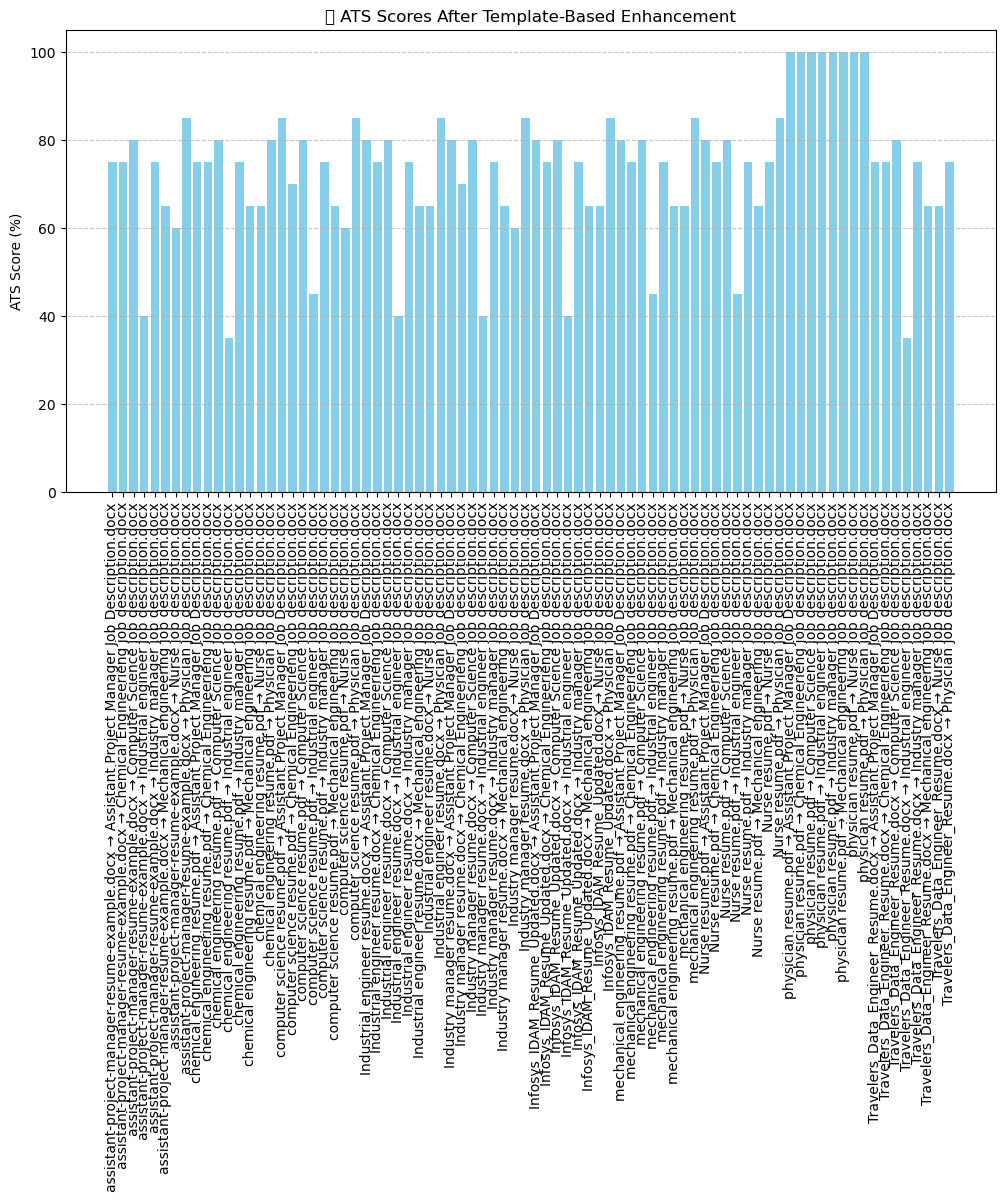

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(
    enhanced_resumes_df["Resume"] + " → " + enhanced_resumes_df["Job Description"],
    enhanced_resumes_df["ATS Score After Enhancement"],
    color='skyblue'
)
plt.title("🔹 ATS Scores After Template-Based Enhancement")
plt.ylabel("ATS Score (%)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [53]:
# ✅ Recalculate ATS Score after enhancement
enhanced_resumes_df["ATS Score After Enhancement"] = (
    (1 - (enhanced_resumes_df["Missing Skills"].apply(len) / 20)) * 100
)

# ✅ Show full table with all details
import pandas as pd
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows

# ✅ Display all ATS-related details
display(enhanced_resumes_df)


,Resume,Job Description,BERT Similarity,Missing Skills,Enhanced Resume Text,ATS Score After Enhancement
0,assistant-project-manager-resume-example.docx,Assistant Project Manager Job Description.docx,0.892863,"[rfi’s, rai, project, pto, project closure col...",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...,75.0
1,assistant-project-manager-resume-example.docx,Chemical Engineerieng job description.docx,0.913016,"[premium, technical, iso, chemical process, tx]",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...,75.0
2,assistant-project-manager-resume-example.docx,Computer Science job description.docx,0.931188,"[healthcare, premium, linux, dental]",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...,80.0
3,assistant-project-manager-resume-example.docx,Industrial engineer job description.docx,0.917324,"[hmi, perks, rockwell, fat, pto, education, ex...",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...,40.0
4,assistant-project-manager-resume-example.docx,Industry manager job description.docx,0.947027,"[premium, lidar, tx, own, pto]",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...,75.0
5,assistant-project-manager-resume-example.docx,Mechanical engineering job description.docx,0.939519,"[premium, 3d, improve, success, evaluate, prem...",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...,65.0
6,assistant-project-manager-resume-example.docx,Nurse job description.docx,0.904227,"[dea, premium, universal health, health, gener...",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...,60.0
7,assistant-project-manager-resume-example.docx,Physician job description.docx,0.907000,"[premium, board certified, llc]",SEAN HAN ASSISTANT PROJECT MANAGER CONTACT se...,85.0
8,chemical engineering resume.pdf,Assistant Project Manager Job Description.docx,0.854263,"[rai, microsoft office, lessons learned, proje...",Experienced Engineering\n790 East 1319 South (...,75.0
9,chemical engineering resume.pdf,Chemical Engineerieng job description.docx,0.858813,"[premium, technical, iso, microsoft office, tx]",Experienced Engineering\n790 East 1319 South (...,75.0


# Intergreting the Model

In [24]:
import joblib

matcher = ResumeMatcher(threshold=0.5)  # or your preferred threshold
joblib.dump(matcher, "resume_matcher.pkl")



['resume_matcher.pkl']

In [54]:
import joblib

matcher = joblib.load("resume_matcher.pkl")
result = matcher.predict("Resume text here", "Job description here")
print(result)


{'similarity_score': 0.338, 'match': False}


In [2]:
import joblib
from sentence_transformers import SentenceTransformer, util

class ResumeEnhancer:
    def __init__(self):
        self.model = SentenceTransformer('all-MiniLM-L6-v2')  # or whichever model you're using

    def predict(self, inputs):
        resume_text, job_desc_text = inputs

        resume_emb = self.model.encode(resume_text, convert_to_tensor=True)
        job_emb = self.model.encode(job_desc_text, convert_to_tensor=True)

        score = util.cos_sim(resume_emb, job_emb).item() * 100

        # Return dummy or simplified output for now
        return [
            f"{score:.2f}%",  # Skills Match
            "Medium",         # Experience Match (placeholder)
            "Low",            # Education Match (placeholder)
            "Overall Fit: Good" if score > 70 else "Needs Improvement"
        ]


In [1]:
enhancer = ResumeEnhancer()
joblib.dump(enhancer, "resume_enhancerNew.pkl")


NameError: name 'ResumeEnhancer' is not defined

In [60]:
model = joblib.load("resume_enhancer.pkl")
result = model.predict(["your resume text", "job description text"])
print(result)


['70.81%', 'Medium', 'Low', 'Overall Fit: Good']
